## Import

### 1.1 Import Statements

In [1]:
import pandas as pd
import networkx as nx
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np
from ndlib.models import epidemics
import ndlib.models.ModelConfig as config
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')
%matplotlib inline

no display found. Using non-interactive Agg backend


### 1.2 Importing Files

In [2]:
rfc = pd.read_csv('REQUESTS_FOR_COMMENT.csv')
users_file = pd.read_csv('USERS.csv')
wiki = pd.read_csv('WIKIPROJECTS.csv')

print(f"Loaded RFC1.csv with shape: {rfc.shape}")
print(f"Loaded USERS.csv with shape: {users_file.shape}")
print(f"Loaded WIKIPROJECTS.csv with shape: {wiki.shape}")

Loaded RFC1.csv with shape: (2925, 3)
Loaded USERS.csv with shape: (171692, 3)
Loaded WIKIPROJECTS.csv with shape: (11861, 3)


## Functions

#### Threshold Model

In [3]:
def threshold_model(G, mu, sigma, iterations=25, seed_count=2):

    thresholds = np.random.normal(mu, sigma, len(G.nodes))
    initial_trolls = np.random.choice(list(G.nodes), size=seed_count, replace=False)

    model = epidemics.ThresholdModel(G)
    cfg = config.Configuration()
    cfg.add_model_initial_configuration("Infected", list(initial_trolls))

    for i, node in enumerate(G.nodes()):
        cfg.add_node_configuration("threshold", node, thresholds[i])

    model.set_initial_status(cfg)
    sim_iterations = model.iteration_bunch(iterations)
    trends = model.build_trends(sim_iterations)

    return model, sim_iterations, trends

#### Degree Analysis

In [4]:
def degree_analysis(Actual_degree, Random_degree):
    print("--------Average--------")
    print("Average Degree of Actual Network: ", sum(Actual_degree.values())/len(Actual_degree))
    print("Average Degree of Random Network: ", sum(Random_degree.values())/len(Random_degree))
    print("--------Standard Deviation--------")
    print("Standard Deviation of Degree of Actual Network: ", np.std(list(Actual_degree.values())))
    print("Standard Deviation of Degree of Random Network: ", np.std(list(Random_degree.values())))
    print("--------Median--------")
    print("Median of Degree of Actual Network: ", np.median(list(Actual_degree.values())))
    print("Median of Degree of Random Network: ", np.median(list(Random_degree.values())))

#### Degree Plotting

In [12]:
def degree_distributions(degree_dict, title="Degree Histogram"):
    degrees = list(degree_dict.values())
    plt.figure(figsize=(8, 5))
    plt.hist(degrees, bins=30, color='blue', edgecolor='black', alpha=0.75)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

## 2 Request for Comments

### 2.1 Request For Comments Graph

This section is used for graph generation for the "Requests for Comments" file as well as visualization and calculating it's metrics to be used in section 2.3 for comparison between this network and a random network of similar proportion.

#### 2.1.1 Graph Generation

In [6]:
RFC_Graph = nx.Graph()

all_users=set(rfc["username"].unique()) # Storing users w.r.f. unique usernames
RFC_Graph.add_nodes_from(all_users) # Initializing unique users on the graph


thread_user_map = defaultdict(set) # Initializing dictionary to store user interactions
for i, row in rfc.iterrows():
    key = (row["page_name"], row["thread_subject"])
    thread_user_map[key].add(row["username"]) # Storing user interactions w.r.f. unique page name, and thread subject combinations


for users in thread_user_map.values():
    user_list = list(users)
    for i in range(len(user_list)):
        for j in range(i + 1, len(user_list)): 
            RFC_Graph.add_edge(user_list[i], user_list[j]) # Adding edges from dictionary

print("Number of nodes:", RFC_Graph.number_of_nodes())
print("Number of edges:", RFC_Graph.number_of_edges())

Number of nodes: 888
Number of edges: 27569


#### 2.1.2 Graph Visualization

In [ ]:
pos = nx.spring_layout(RFC_Graph, seed=42, k=1.1, iterations=100)

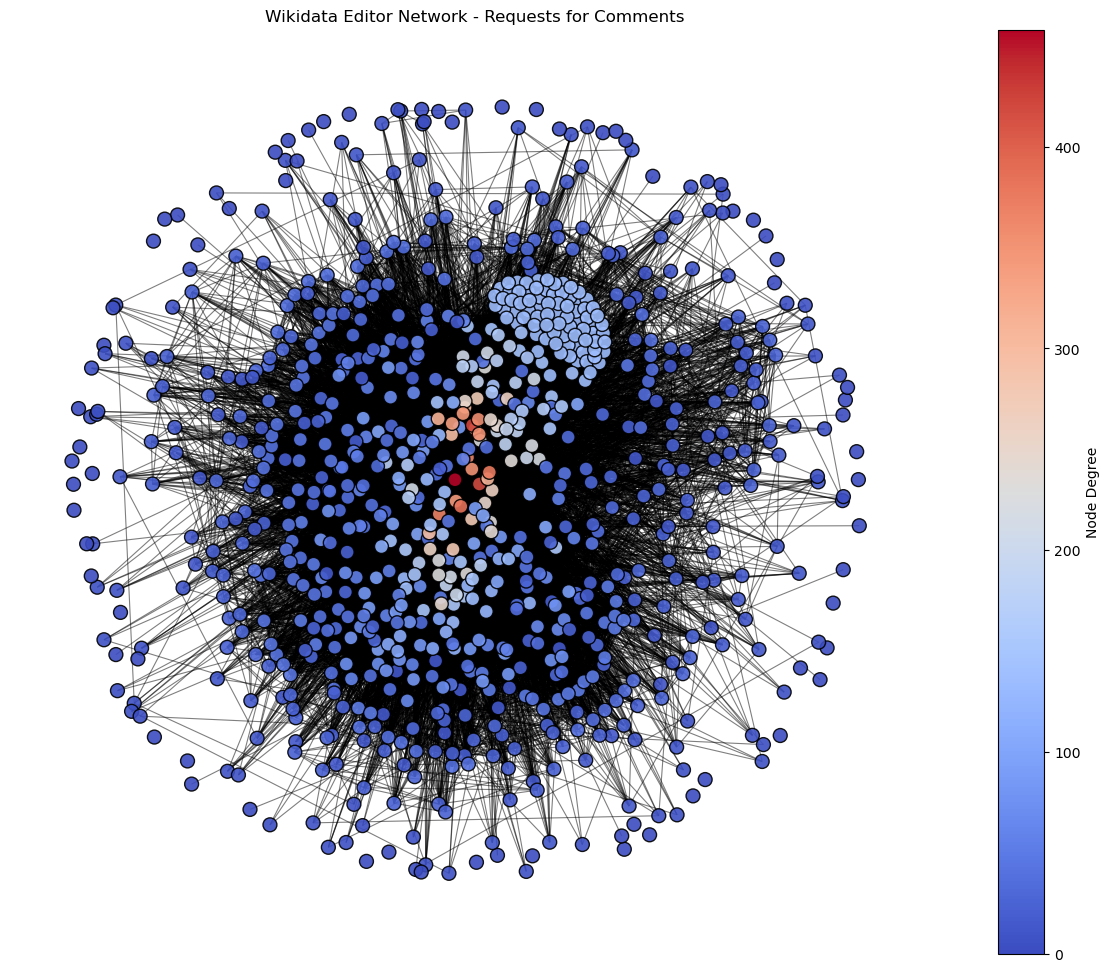

In [53]:
fig, ax = plt.subplots(figsize=(15, 12))

node_degrees = dict(RFC_Graph.degree())
node_colors = [node_degrees[n] for n in RFC_Graph.nodes()]

nx.draw_networkx_nodes(
    RFC_Graph, pos,
    node_color=node_colors,
    cmap=plt.cm.coolwarm,
    node_size=100,
    alpha=0.9,
    edgecolors='black',
    ax=ax
)

nx.draw_networkx_edges(
    RFC_Graph, pos,
    alpha=0.5,
    width=0.8,
    ax=ax
)

sm = plt.cm.ScalarMappable(
    cmap=plt.cm.coolwarm,
    norm=plt.Normalize(vmin=min(node_degrees.values()), vmax=max(node_degrees.values()))
)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Node Degree')

ax.set_axis_off()
ax.set_title("Wikidata Editor Network - Requests for Comments")

plt.show()

#### 2.1.3 Degree by user

In [7]:
degree_RFC = {node: RFC_Graph.degree(node) for node in RFC_Graph.nodes()}
print(degree_RFC)

{'Dom': 15, 'LWyatt (WMF)': 4, 'Matthew hk': 5, 'Mike Novikoff': 136, 'Rsocol': 6, 'Nomen ad hoc': 14, 'Vive la Rosière': 51, 'Stefan2': 44, 'Christian Ferrer': 48, 'Matěj Suchánek': 175, 'Helder.wiki': 57, 'Pichpich': 122, 'Anonymous_username_608': 0, 'Tm': 1, 'Muelleum': 5, 'Bene*': 175, 'The RedBurn': 136, 'Delirium': 42, 'Jheald': 221, 'Raystorm': 43, 'Dipsode87': 136, 'Kristbaum': 29, 'Jagulin': 3, 'Mark91': 76, 'Masumrezarock100': 19, 'Cycn': 54, 'Tetizeraz': 23, 'CennoxX': 226, 'The Anome': 44, 'Jane023': 171, 'odder': 40, 'MB-one': 136, 'Zil': 41, 'Viciarg': 136, 'FunPika': 39, 'Docu': 27, 'Ladsgroup': 48, 'DBrant (WMF)': 7, 'Maximilianklein': 60, 'Rich Farmbrough': 22, 'Whatamidoing (WMF)': 19, 'Allan Aguilar': 22, 'H-stt': 29, 'Nikki': 138, '1997kB': 23, 'Arctic.gnome': 30, 'Byrial': 126, 'Hanshandlampe': 0, 'Romaine': 160, 'Wikisaurus': 136, 'Sbisolo': 21, 'Edgars2007': 29, 'Matthias Winkelmann': 13, 'Techman224': 75, '77.13.210.177': 22, 'Mateuszek045': 44, 'Caliburn': 19, 

#### 2.1.4 Top 5 Contributors

In [55]:
top_contributors_RFC = Counter(degree_RFC).most_common(5)
print(top_contributors_RFC)

[('Rschen7754', 458), ('ArthurPSmith', 423), ('Ymblanter', 418), ('Stryn', 383), ('TomT0m', 374)]


#### 2.1.5 Average Clustering Coefficient

In [56]:
avg_clustering_RFC = nx.average_clustering(RFC_Graph)
print("Average Clustering Coefficient:", avg_clustering_RFC)


Average Clustering Coefficient: 0.7818077578450455


#### 2.1.6 Number of Connected Components / Size of Largest Connected Component

In [57]:
num_components_RFC = nx.number_connected_components(RFC_Graph)
largest_component_size_RFC = len(max(nx.connected_components(RFC_Graph), key=len))

print("Number of Connected Components:", num_components_RFC)
print("Size of Largest Connected Component:", largest_component_size_RFC)

Number of Connected Components: 54
Size of Largest Connected Component: 833


#### 2.1.7 Betweenness Centrality

In [58]:
betweenness_centrality_RFC = nx.betweenness_centrality(RFC_Graph)
betweenness_centrality_top5_RFC = Counter(betweenness_centrality_RFC).most_common(5)
print("Betweenness Centrality Top 5:", betweenness_centrality_top5_RFC)

Betweenness Centrality Top 5: [('ArthurPSmith', 0.05670165049622737), ('Ymblanter', 0.041074190866777514), ('Rschen7754', 0.037914641944748285), ('ChristianKl', 0.03610823450856508), ('GZWDer', 0.03350520090443833)]


#### 2.1.8 Average Shortest Path (Largest Component)

In [89]:
largest_cc_RFC = max(nx.connected_components(RFC_Graph), key=len)
RFC_largest = RFC_Graph.subgraph(largest_cc_RFC)
avg_shortest_path_RFC = nx.average_shortest_path_length(RFC_largest)
print("Average Shortest Path Length:", avg_shortest_path_RFC)

Average Shortest Path Length: 2.0867375796472434


#### 2.1.9 Threshold Model

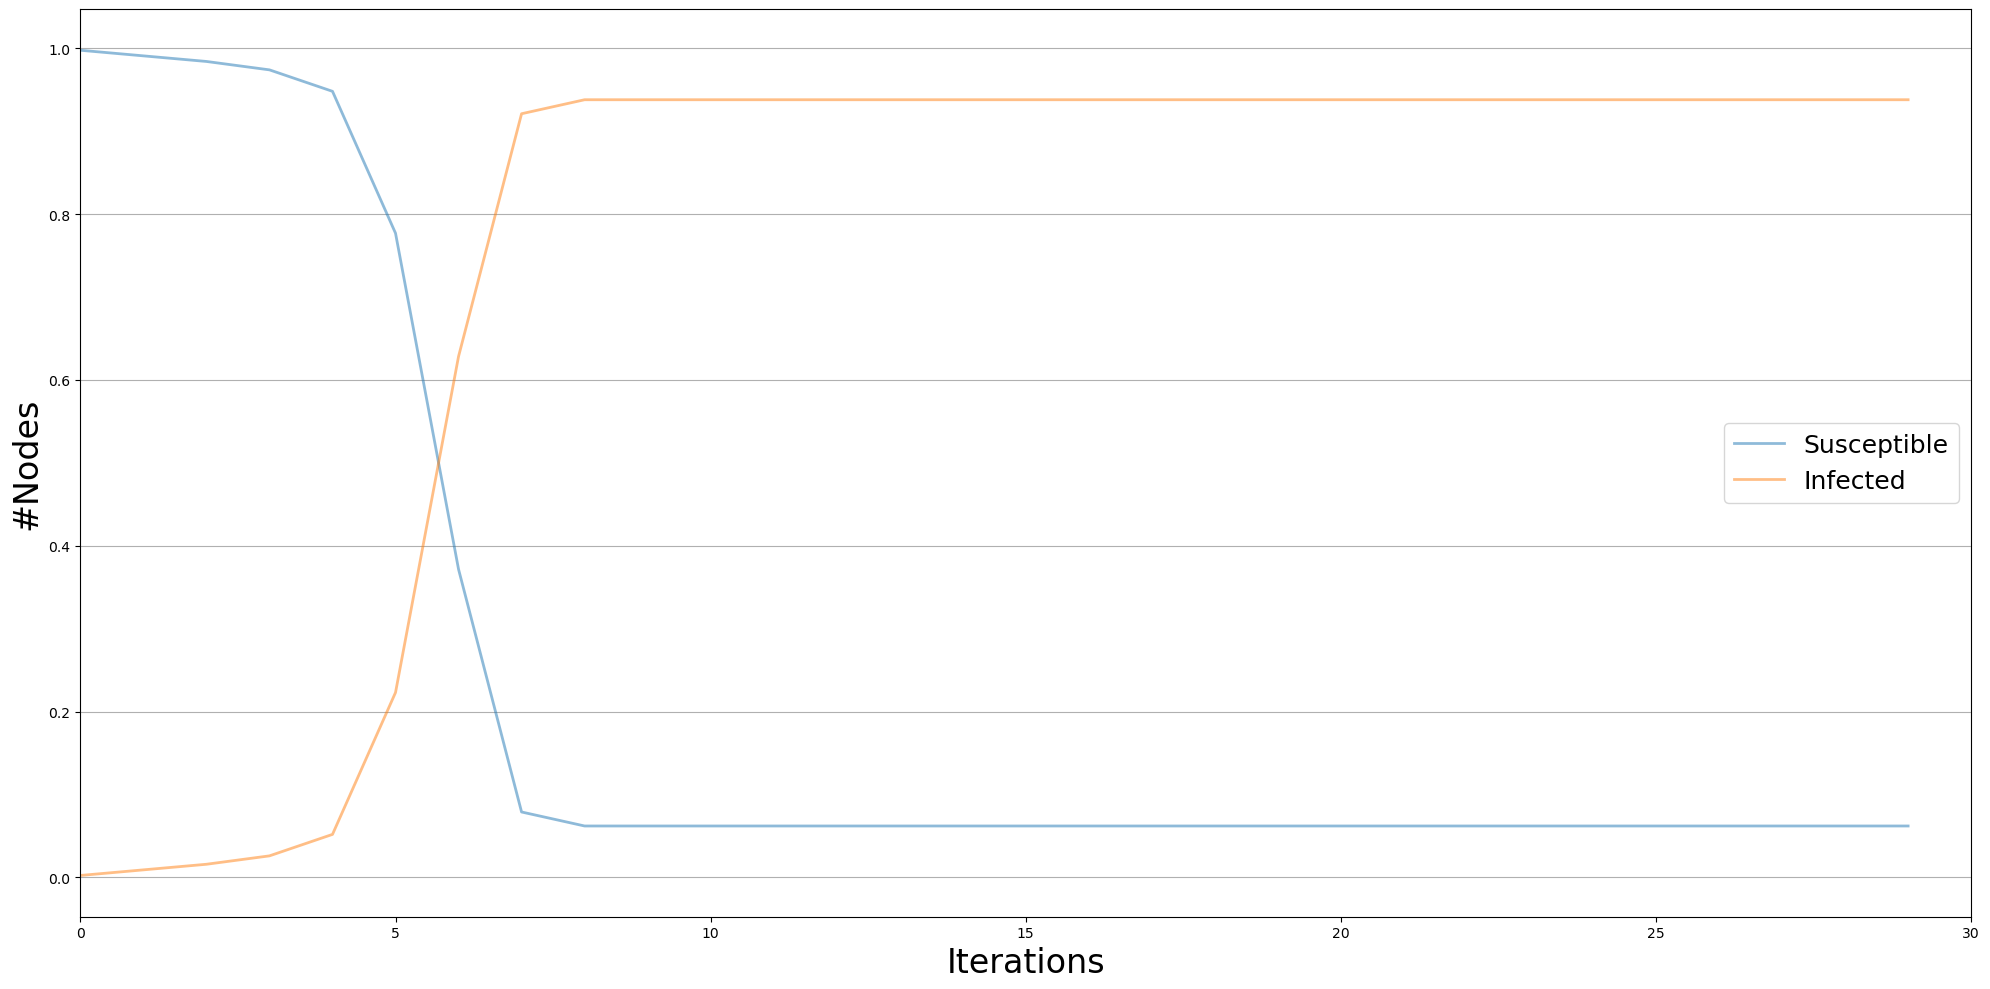

In [ ]:
mu, sigma = 0.08, 0.03

model, iters, trends = threshold_model(RFC_Graph, mu, sigma, 30)

viz = DiffusionTrend(model, trends)
viz.plot()

####  2.1.10 Priority List

In [43]:
day_to_check = 3
status_by_day = {}
status_by_day.update(iters[0]['status'])
for day in range(1, day_to_check + 1):
    status_by_day.update(iters[day]['status'])


risk_score = {}
for editor in RFC_Graph.nodes():
    if status_by_day.get(editor, 0) == 0: 
        infected_neighbors = 0
        for neighbor in RFC_Graph.neighbors(editor):
            if status_by_day.get(neighbor, 0) == 1:
                infected_neighbors += 1
        risk_score[editor] = infected_neighbors


priority_list = []
for editor in risk_score:
    score = risk_score[editor]
    priority_list.append((editor, score))

priority_list = sorted(priority_list, key=lambda x: x[1], reverse=True)
print("Top Editors to Check:")
for i in range(3):
    editor, nearby_trolls = priority_list[i]
    print("Editor:", editor, "/ Infected Neighbors:", nearby_trolls)

Top Editors to Check:
Editor: Ymblanter / Infected Neighbors: 255
Editor: Liuxinyu970226 / Infected Neighbors: 171
Editor: Infovarius / Infected Neighbors: 164


### 2.2 Random Network | Request for Comments

This section represents a random network of similar proportions as the network generated in section 2.1. The same visualizations and metrics have been executed on this network for use during comparison in section 2.3.

#### 2.2.1 Graph Generation

In [8]:
N = RFC_Graph.number_of_nodes()
E = RFC_Graph.number_of_edges()
RFC_random = nx.gnm_random_graph(N, E)

print("Number of nodes:", RFC_random.number_of_nodes())
print("Number of edges:", RFC_random.number_of_edges())

Number of nodes: 888
Number of edges: 27569


#### 2.2.2 Graph Visualization

In [ ]:
pos = nx.spring_layout(RFC_random, seed=42, k=1.1, iterations=100)

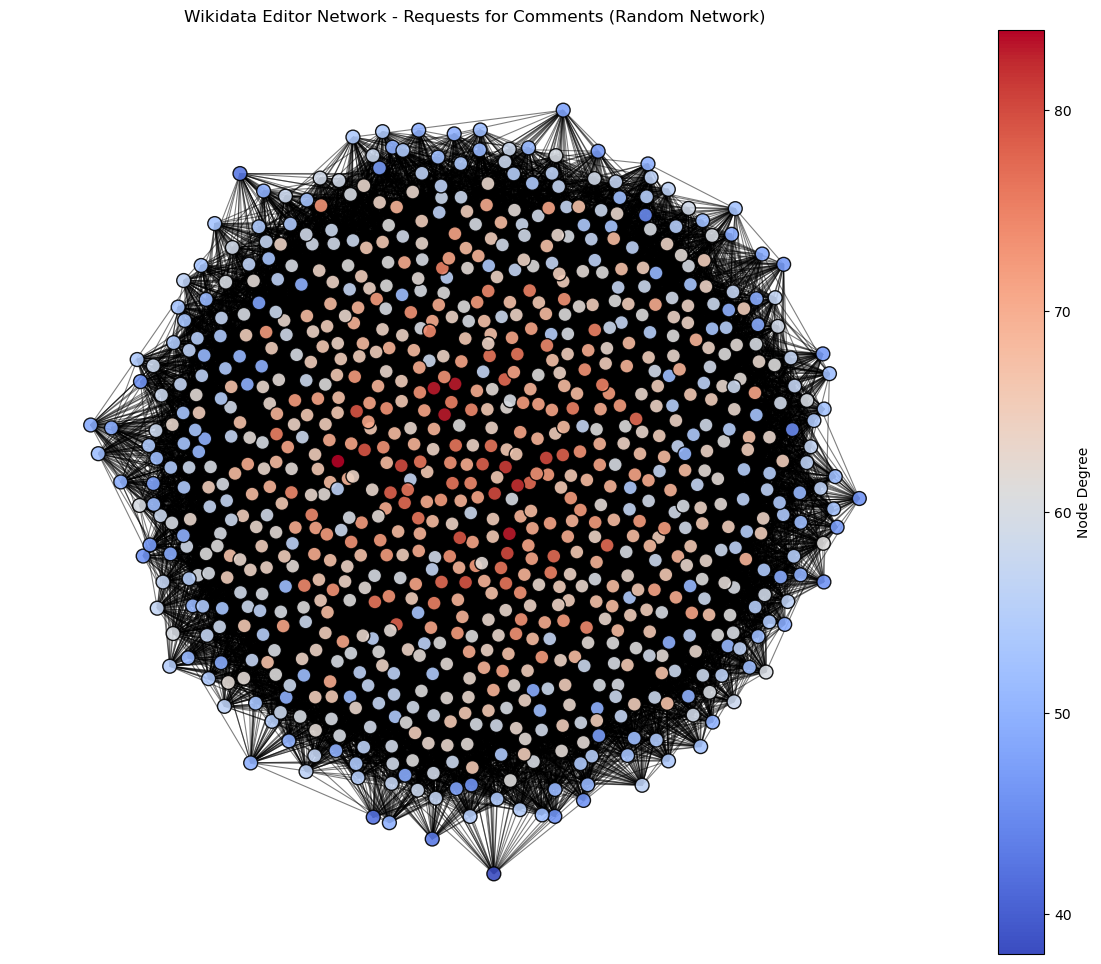

In [60]:
fig, ax = plt.subplots(figsize=(15, 12))

node_degrees = dict(RFC_random.degree())
node_colors = [node_degrees[n] for n in RFC_random.nodes()]

nx.draw_networkx_nodes(
    RFC_random, pos,
    node_color=node_colors,
    cmap=plt.cm.coolwarm,
    node_size=100,
    alpha=0.9,
    edgecolors='black',
    ax=ax
)

nx.draw_networkx_edges(
    RFC_random, pos,
    alpha=0.5,
    width=0.8,
    ax=ax
)

sm = plt.cm.ScalarMappable(
    cmap=plt.cm.coolwarm,
    norm=plt.Normalize(vmin=min(node_degrees.values()), vmax=max(node_degrees.values()))
)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Node Degree')

ax.set_axis_off()
ax.set_title("Wikidata Editor Network - Requests for Comments (Random Network)")

plt.show()

#### 2.2.3 Degree by user

In [9]:
degree_random_RFC = {node: RFC_random.degree(node) for node in RFC_random.nodes()}
print(degree_random_RFC)

{0: 65, 1: 57, 2: 78, 3: 59, 4: 51, 5: 65, 6: 69, 7: 71, 8: 63, 9: 62, 10: 66, 11: 67, 12: 61, 13: 69, 14: 78, 15: 51, 16: 69, 17: 61, 18: 74, 19: 61, 20: 64, 21: 65, 22: 79, 23: 68, 24: 69, 25: 56, 26: 63, 27: 62, 28: 67, 29: 59, 30: 63, 31: 61, 32: 70, 33: 65, 34: 55, 35: 69, 36: 50, 37: 61, 38: 48, 39: 53, 40: 61, 41: 63, 42: 51, 43: 63, 44: 51, 45: 57, 46: 66, 47: 54, 48: 63, 49: 67, 50: 65, 51: 58, 52: 59, 53: 69, 54: 80, 55: 67, 56: 53, 57: 58, 58: 63, 59: 73, 60: 56, 61: 53, 62: 54, 63: 80, 64: 64, 65: 63, 66: 59, 67: 60, 68: 66, 69: 55, 70: 54, 71: 65, 72: 64, 73: 73, 74: 62, 75: 48, 76: 51, 77: 58, 78: 52, 79: 47, 80: 50, 81: 65, 82: 66, 83: 52, 84: 41, 85: 52, 86: 61, 87: 72, 88: 52, 89: 48, 90: 75, 91: 62, 92: 66, 93: 63, 94: 48, 95: 64, 96: 61, 97: 56, 98: 55, 99: 59, 100: 62, 101: 61, 102: 59, 103: 59, 104: 53, 105: 62, 106: 67, 107: 62, 108: 66, 109: 67, 110: 61, 111: 72, 112: 62, 113: 55, 114: 67, 115: 63, 116: 58, 117: 60, 118: 52, 119: 60, 120: 47, 121: 70, 122: 73, 12

#### 2.2.4 Top 5 Contributors

In [62]:
top_contributors_random_RFC = Counter(degree_random_RFC).most_common(5)
print(top_contributors_random_RFC)

[(466, 84), (130, 83), (224, 83), (809, 83), (856, 83)]


#### 2.2.5 Average Clustering Coefficient

In [63]:
avg_clustering_random_RFC = nx.average_clustering(RFC_random)
print("Average Clustering Coefficient:", avg_clustering_random_RFC)


Average Clustering Coefficient: 0.07049103802109816


#### 2.2.6 Number of Connected Components / Size of Largest Connected Component

In [64]:
num_components_random_RFC = nx.number_connected_components(RFC_random)
largest_component_size_random_RFC = len(max(nx.connected_components(RFC_random), key=len))

print("Number of Connected Components:", num_components_random_RFC)
print("Size of Largest Connected Component:", largest_component_size_random_RFC)

Number of Connected Components: 1
Size of Largest Connected Component: 888


#### 2.2.7 Betweenness Centrality

In [49]:
betweenness_centrality_random_RFC = nx.betweenness_centrality(RFC_random)
betweenness_centrality_top5_random_RFC = Counter(betweenness_centrality_random_RFC).most_common(5)
print("Betweenness Centrality Top 5:", betweenness_centrality_top5_random_RFC)

Betweenness Centrality Top 5: [(823, 0.002273286050546465), (132, 0.002091544461535513), (376, 0.001988701396669736), (568, 0.0019652482488110414), (772, 0.0019086237722774268)]


#### 2.2.8 Average Shortest Path (Largest Component)

In [91]:
largest_cc_RFC_random = max(nx.connected_components(RFC_random), key=len)
RFC_random_largest = RFC_random.subgraph(largest_cc_RFC_random)
avg_shortest_path_RFC_random = nx.average_shortest_path_length(RFC_random_largest)
print("Average Shortest Path Length:", avg_shortest_path_RFC_random)

Average Shortest Path Length: 1.9419111896563983


#### 2.2.9 Threshold Model

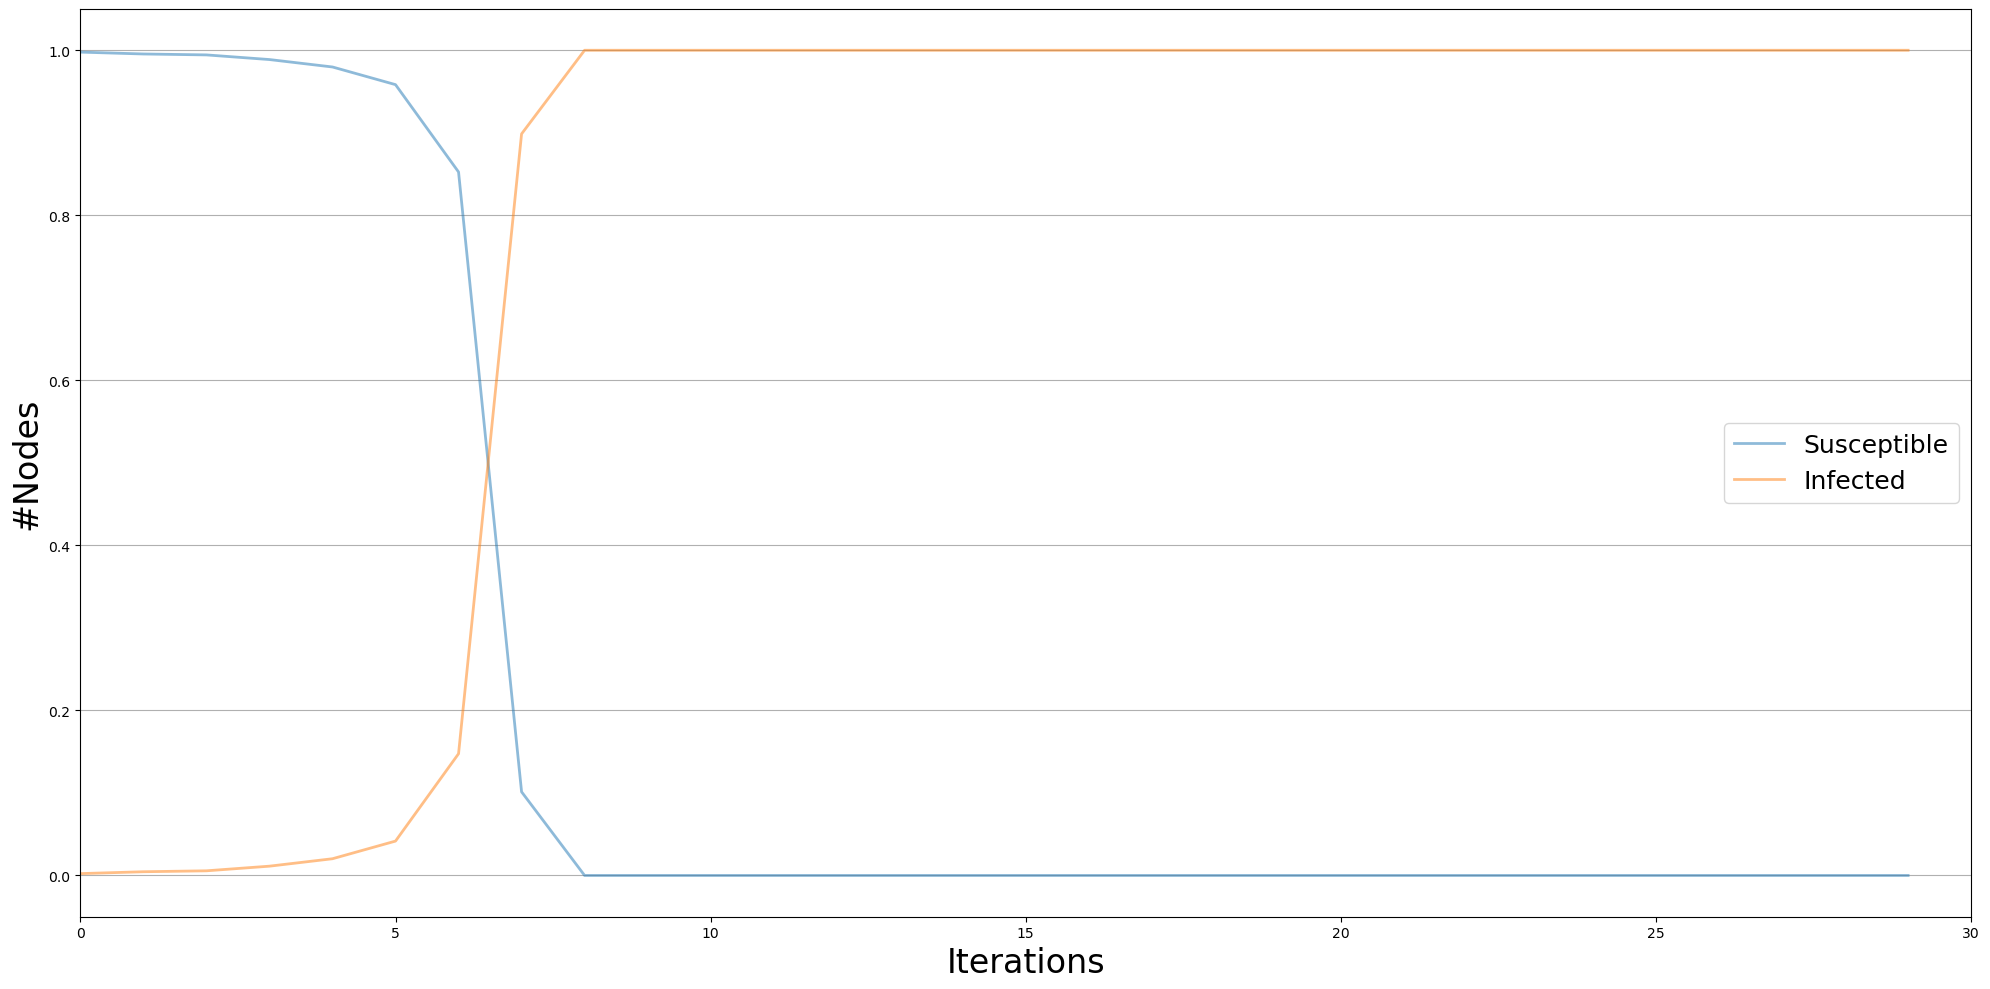

In [77]:
mu, sigma = 0.08, 0.03

model, iters, trends = threshold_model(RFC_random, mu, sigma, 30)

viz = DiffusionTrend(model, trends)
viz.plot()

### 2.3 Comparison | Request for Comments | (Actual Network vs Random Network)

#### 2.3.1 Degree Comparison

In [53]:
degree_analysis(degree_RFC, degree_random_RFC)

--------Average--------
Average Degree of Actual Network:  62.09234234234234
Average Degree of Random Network:  62.09234234234234
--------Standard Deviation--------
Standard Deviation of Degree of Actual Network:  72.15403964336144
Standard Deviation of Degree of Random Network:  7.743962188007391
--------Median--------
Median of Degree of Actual Network:  36.0
Median of Degree of Random Network:  62.0


#### 2.3.2 Top 5 Contributors

In [66]:
print("Top 5 Contributors of Actual Network: ", top_contributors_RFC)
print("Top 5 Contributors of Random Network: ", top_contributors_random_RFC)

Top 5 Contributors of Actual Network:  [('Rschen7754', 458), ('ArthurPSmith', 423), ('Ymblanter', 418), ('Stryn', 383), ('TomT0m', 374)]
Top 5 Contributors of Random Network:  [(466, 84), (130, 83), (224, 83), (809, 83), (856, 83)]


#### 2.3.3 Average Clustering Coefficient

In [71]:
print("Average Clustering Coefficient of Actual Network: ", avg_clustering_RFC)
print("Average Clustering Coefficient of Random Network: ", avg_clustering_random_RFC)

Average Clustering Coefficient of Actual Network:  0.7818077578450455
Average Clustering Coefficient of Random Network:  0.07049103802109816


#### 2.3.4 Number of Connected Components

In [72]:
print("Number of Connected Components of Actual Network: ", num_components_RFC)
print("Number of Connected Components of Random Network: ", num_components_random_RFC)

Number of Connected Components of Actual Network:  54
Number of Connected Components of Random Network:  1


#### 2.3.5 Size of Largest Connected Component

In [73]:
print("Size of Largest Connected Component of Actual Network: ", largest_component_size_RFC)
print("Size of Largest Connected Component of Random Network: ", largest_component_size_random_RFC)

Size of Largest Connected Component of Actual Network:  833
Size of Largest Connected Component of Random Network:  888


#### 2.3.6 Betweenness Centrality (Top 5)

In [75]:
print("Betweenness Centrality Top 5 of Actual Network: ", betweenness_centrality_top5_RFC)
print("Betweenness Centrality Top 5 of Random Network: ", betweenness_centrality_top5_random_RFC)

Betweenness Centrality Top 5 of Actual Network:  [('ArthurPSmith', 0.05670165049622737), ('Ymblanter', 0.041074190866777514), ('Rschen7754', 0.037914641944748285), ('ChristianKl', 0.03610823450856508), ('GZWDer', 0.03350520090443833)]
Betweenness Centrality Top 5 of Random Network:  [(823, 0.002273286050546465), (132, 0.002091544461535513), (376, 0.001988701396669736), (568, 0.0019652482488110414), (772, 0.0019086237722774268)]


#### 2.3.7 Average Shortest Path

In [92]:
print("Average Shortest Path of Actual Network: ", avg_shortest_path_RFC)
print("Average Shortest Path of Random Network: ", avg_shortest_path_RFC_random)


Average Shortest Path of Actual Network:  2.0867375796472434
Average Shortest Path of Random Network:  1.9419111896563983


#### 2.3.8 Degree Distribution Plot Actual Network

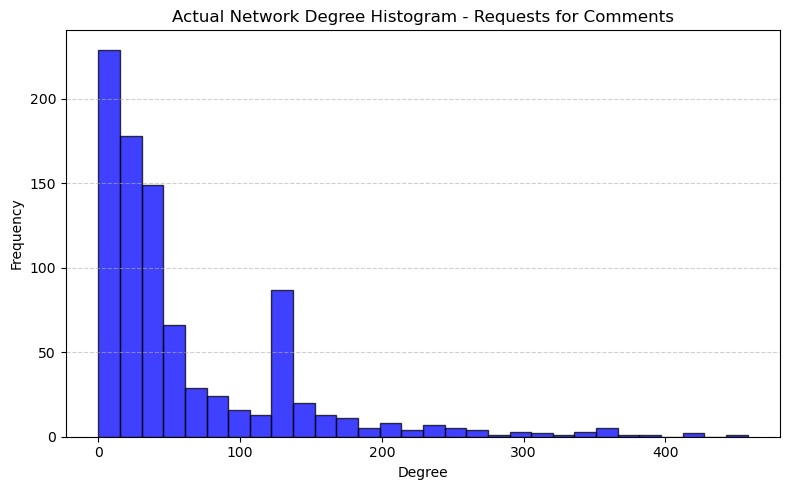

In [29]:
degree_distributions(degree_RFC, title="Actual Network Degree Histogram - Requests for Comments")

#### 2.3.9 Degree Distribution Plot Random Network

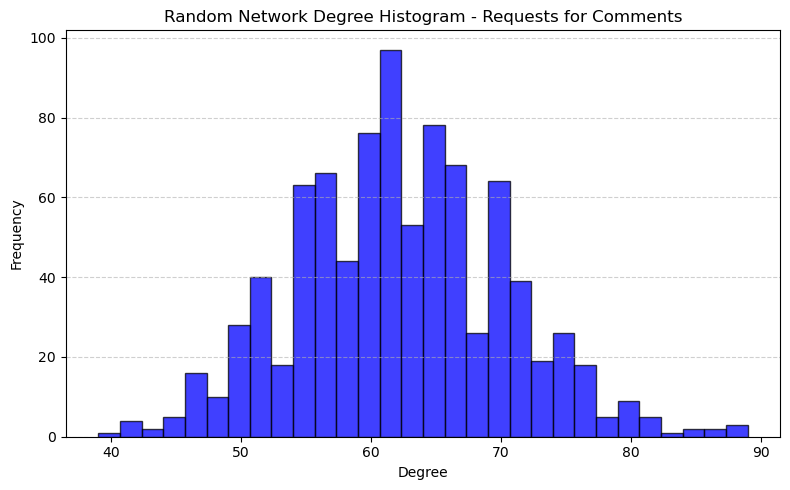

In [30]:
degree_distributions(degree_random_RFC, title="Random Network Degree Histogram - Requests for Comments")

## 3 WIKIPROJECTS

### 3.1 WIKIPROJECTS Graph

This section is used for graph generation for the "WIKIPROJECTS" file as well as visualization and calculating it's metrics to be used in section 3.3 for comparison between this network and a random network of similar proportion.

#### 3.1.1 Graph Generation

In [17]:
WIKIPROJECTS_Graph = nx.Graph()

all_users=set(wiki["username"].unique()) # Storing users w.r.f. unique usernames
WIKIPROJECTS_Graph.add_nodes_from(all_users) # Initializing unique users on the graph


thread_user_map = defaultdict(set) # Initializing dictionary to store user interactions
for i, row in wiki.iterrows():
    key = (row["page_name"], row["thread_subject"])
    thread_user_map[key].add(row["username"]) # Storing user interactions w.r.f. unique page name, and thread subject combinations


for users in thread_user_map.values():
    user_list = list(users)
    for i in range(len(user_list)):
        for j in range(i + 1, len(user_list)): 
            WIKIPROJECTS_Graph.add_edge(user_list[i], user_list[j]) # Adding edges from dictionary

print("Number of nodes:", WIKIPROJECTS_Graph.number_of_nodes())
print("Number of edges:", WIKIPROJECTS_Graph.number_of_edges())

Number of nodes: 1620
Number of edges: 6782


#### 3.1.2 Graph Visualization

In [ ]:
pos = nx.spring_layout(WIKIPROJECTS_Graph, seed=42, k=1.1, iterations=100)

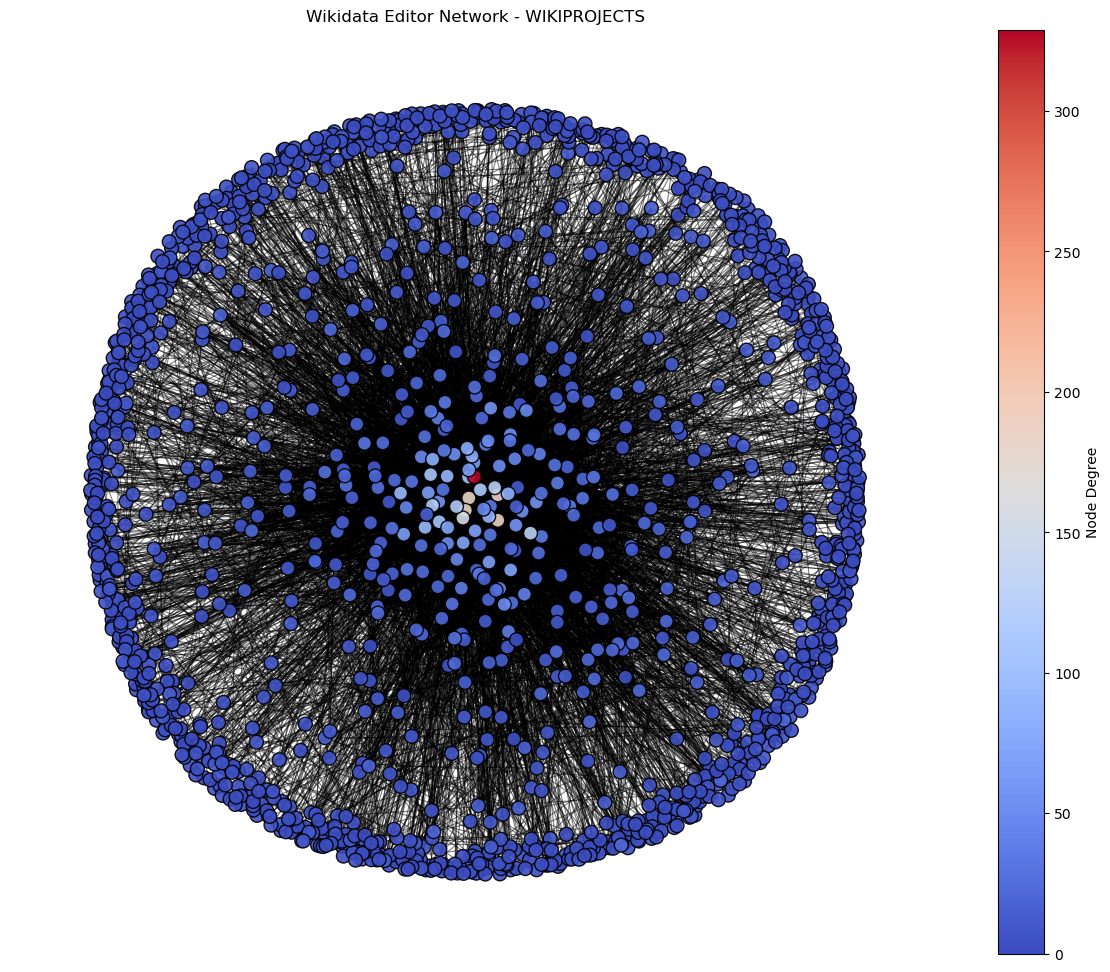

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))

node_degrees = dict(WIKIPROJECTS_Graph.degree())
node_colors = [node_degrees[n] for n in WIKIPROJECTS_Graph.nodes()]

nx.draw_networkx_nodes(
    WIKIPROJECTS_Graph, pos,
    node_color=node_colors,
    cmap=plt.cm.coolwarm,
    node_size=100,
    alpha=0.9,
    edgecolors='black',
    ax=ax
)

nx.draw_networkx_edges(
    WIKIPROJECTS_Graph, pos,
    alpha=0.5,
    width=0.8,
    ax=ax
)

sm = plt.cm.ScalarMappable(
    cmap=plt.cm.coolwarm,
    norm=plt.Normalize(vmin=min(node_degrees.values()), vmax=max(node_degrees.values()))
)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Node Degree')

ax.set_axis_off()
ax.set_title("Wikidata Editor Network - WIKIPROJECTS")

plt.show()

#### 3.1.3 Degree by user

In [18]:
degree_WIKIPROJECTS = {node: WIKIPROJECTS_Graph.degree(node) for node in WIKIPROJECTS_Graph.nodes()}
print(degree_WIKIPROJECTS)

{'Jochem van Hees': 1, 'Nehaoua': 7, 'Rtnf': 3, 'Matěj Suchánek': 22, 'Anonymous_username_957': 3, 'Bene*': 1, 'Viele Grüße --': 12, 'Wuselig': 23, 'Soni': 3, 'Roy17': 2, '2001:7D0:81F7:B580:3065:414E:F0E5:1342': 4, 'CennoxX': 8, 'Genium': 5, 'MNavya': 1, '2001:7D0:81F7:B580:55AF:BB3D:3B1A:D1F8': 5, 'Kooma': 1, 'Anonymous_username_953': 3, '2001:7D0:81DA:F780:C2B:13D8:4F3:FF6': 0, 'Maximilianklein': 4, 'Edinwiki': 1, 'Elya': 6, 'Robevans123': 0, 'Byrial': 3, 'Wikisaurus': 4, 'Edgars2007': 31, 'Adithyak1997': 2, 'Quilt Phase': 2, 'Mateuszek045': 22, 'Avatar6': 7, 'Datawiki30': 9, 'Suyash.dwivedi': 6, 'John Cummings': 11, 'Giovanni Alfredo Garciliano Diaz': 6, 'Okhjon': 0, 'Quimper200': 1, 'Tulipasylvestris': 1, 'Voganaa': 3, 'AntisocialRyan': 6, 'Teolemon': 21, 'Charles Matthews': 29, 'metamorforme42': 8, 'Verdy p': 10, 'MovieFex': 8, 'Geagea': 2, 'Jc3s5h': 12, 'Dancter': 15, 'Louperivois': 10, 'DSGalaktos': 6, 'Mvolz': 10, 'Maxim75': 1, 'Sharouser': 0, 'Werner2101': 4, 'VicVal': 2, 'Ze

#### 3.1.4 Top 5 Contributors

In [11]:
top_contributors_WIKIPROJECTS = Counter(degree_WIKIPROJECTS).most_common(5)
print(top_contributors_WIKIPROJECTS)

[('Jura1', 329), ('VIGNERON', 187), ('TomT0m', 186), ('Snipre', 183), ('Infovarius', 182)]


#### 3.1.5 Average Clustering Coefficient

In [12]:
avg_clustering_WIKIPROJECTS = nx.average_clustering(WIKIPROJECTS_Graph)
print("Average Clustering Coefficient:", avg_clustering_WIKIPROJECTS)


Average Clustering Coefficient: 0.5041946321408051


#### 3.1.6 Number of Connected Components / Size of Largest Connected Component

In [13]:
num_components_WIKIPROJECTS = nx.number_connected_components(WIKIPROJECTS_Graph)
largest_component_size_WIKIPROJECTS = len(max(nx.connected_components(WIKIPROJECTS_Graph), key=len))

print("Number of Connected Components:", num_components_WIKIPROJECTS)
print("Size of Largest Connected Component:", largest_component_size_WIKIPROJECTS)

Number of Connected Components: 202
Size of Largest Connected Component: 1397


#### 3.1.7 Betweenness Centrality

In [14]:
betweenness_centrality_WIKIPROJECTS = nx.betweenness_centrality(WIKIPROJECTS_Graph)
betweenness_centrality_top5_WIKIPROJECTS = Counter(betweenness_centrality_WIKIPROJECTS).most_common(5)
print("Betweenness Centrality Top 5:", betweenness_centrality_top5_WIKIPROJECTS)

Betweenness Centrality Top 5: [('Jura1', 0.1763795345237367), ('VIGNERON', 0.06733654424652613), ('Infovarius', 0.05667773637791079), ('Snipre', 0.05618565175273256), ('TomT0m', 0.05014446308040661)]


#### 3.1.8 Average Shortest Path (Largest Component)

In [94]:
largest_cc_WIKIPROJECTS = max(nx.connected_components(WIKIPROJECTS_Graph), key=len)
WIKIPROJECTS_largest = WIKIPROJECTS_Graph.subgraph(largest_cc_WIKIPROJECTS)
avg_shortest_path_WIKIPROJECTS = nx.average_shortest_path_length(WIKIPROJECTS_largest)
print("Average Shortest Path Length:", avg_shortest_path_WIKIPROJECTS)

Average Shortest Path Length: 3.150434927074595


#### 3.1.9 Threshold Model

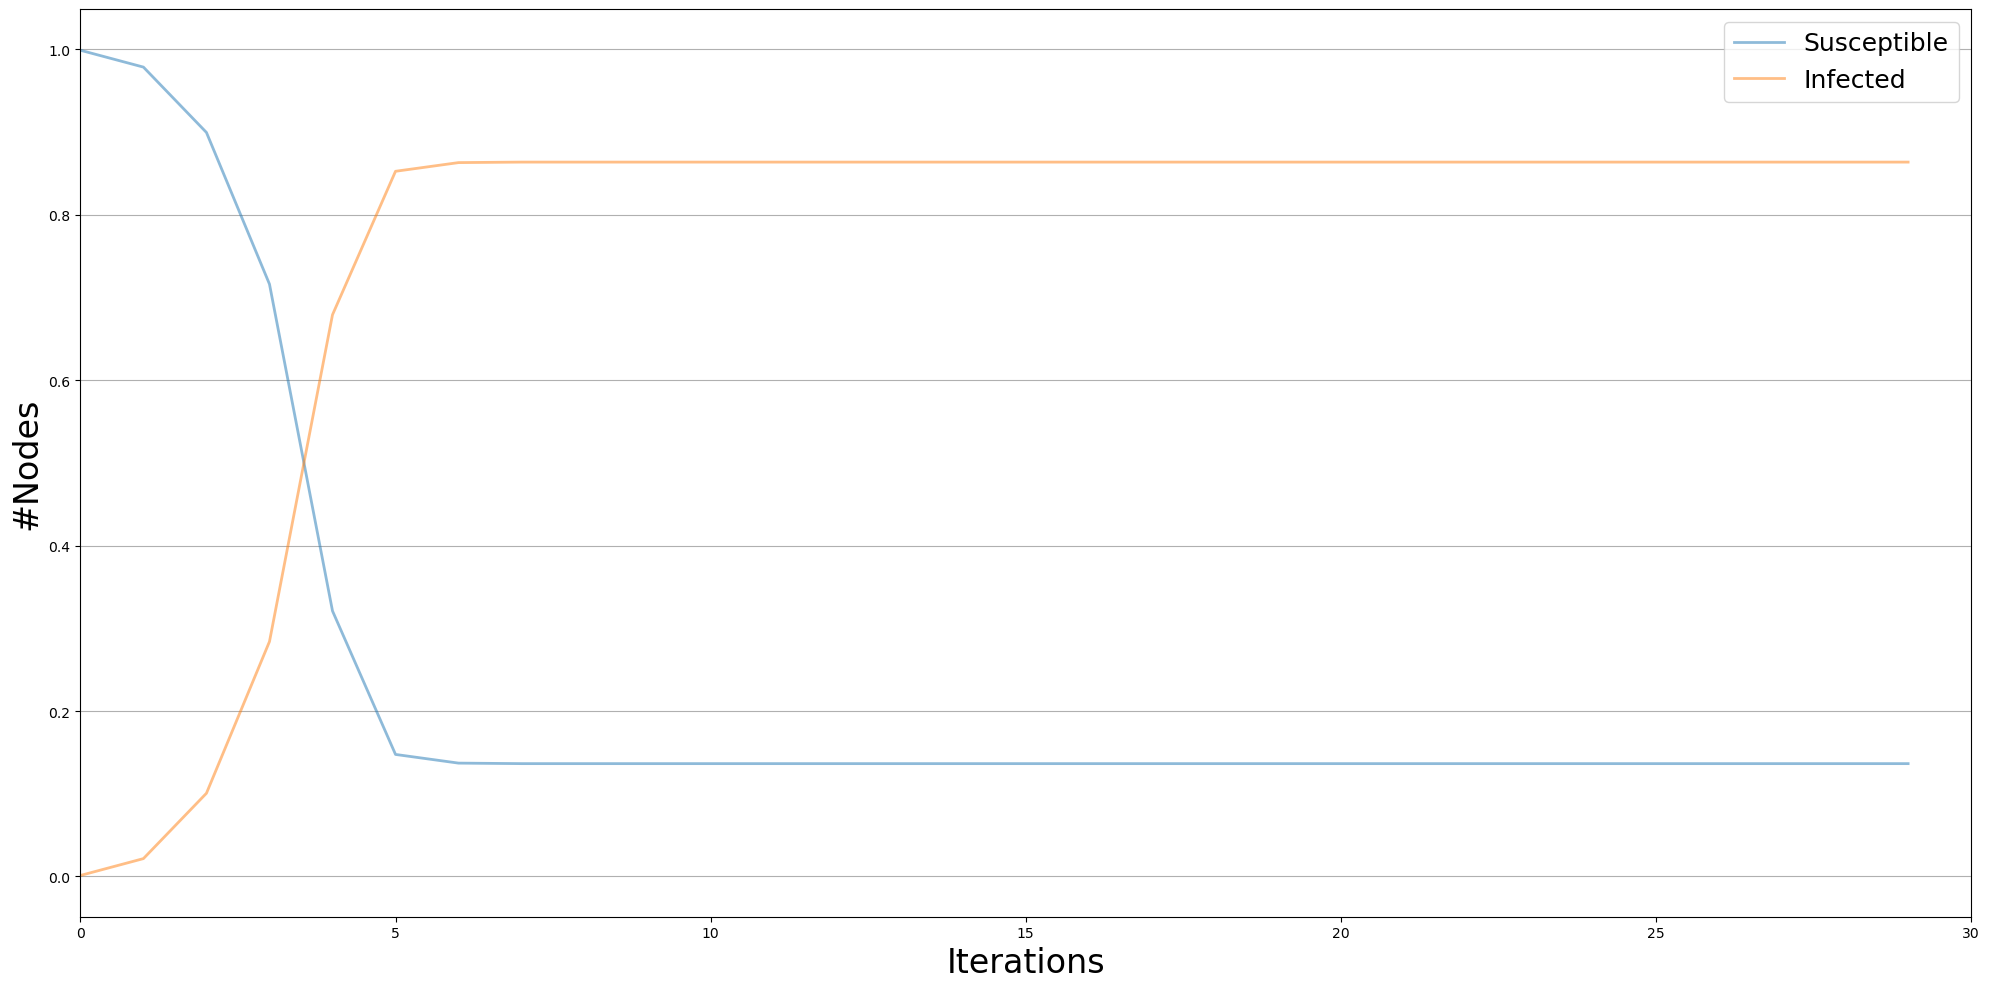

In [71]:
mu, sigma = 0.10, 0.05

model, iters, trends = threshold_model(WIKIPROJECTS_Graph, mu, sigma, 30)

viz = DiffusionTrend(model, trends)
viz.plot()

####  3.1.10 Priority List

In [47]:
day_to_check = 3
status_by_day = {}
status_by_day.update(iters[0]['status'])
for day in range(1, day_to_check + 1):
    status_by_day.update(iters[day]['status'])


risk_score = {}
for editor in WIKIPROJECTS_Graph.nodes():
    if status_by_day.get(editor, 0) == 0: 
        infected_neighbors = 0
        for neighbor in WIKIPROJECTS_Graph.neighbors(editor):
            if status_by_day.get(neighbor, 0) == 1:
                infected_neighbors += 1
        risk_score[editor] = infected_neighbors


priority_list = []
for editor in risk_score:
    score = risk_score[editor]
    priority_list.append((editor, score))

priority_list = sorted(priority_list, key=lambda x: x[1], reverse=True)
print("Top Editors to Check:")
for i in range(3):
    editor, nearby_trolls = priority_list[i]
    print("Editor:", editor, "/ Infected Neighbors:", nearby_trolls)

Top Editors to Check:
Editor: Jura1 / Infected Neighbors: 46
Editor: Infovarius / Infected Neighbors: 30
Editor: TomT0m / Infected Neighbors: 30


### 3.2 Random Network | Request for Comments

This section represents a random network of similar proportions as the network generated in section 2.1. The same visualizations and metrics have been executed on this network for use during comparison in section 2.3.

#### 3.2.1 Graph Generation

In [19]:
N = WIKIPROJECTS_Graph.number_of_nodes()
E = WIKIPROJECTS_Graph.number_of_edges()
WIKIPROJECTS_random = nx.gnm_random_graph(N, E)

print("Number of nodes:", WIKIPROJECTS_random.number_of_nodes())
print("Number of edges:", WIKIPROJECTS_random.number_of_edges())

Number of nodes: 1620
Number of edges: 6782


#### 3.2.2 Graph Visualization

In [ ]:
pos = nx.spring_layout(WIKIPROJECTS_random, seed=42, k=1.1, iterations=100)

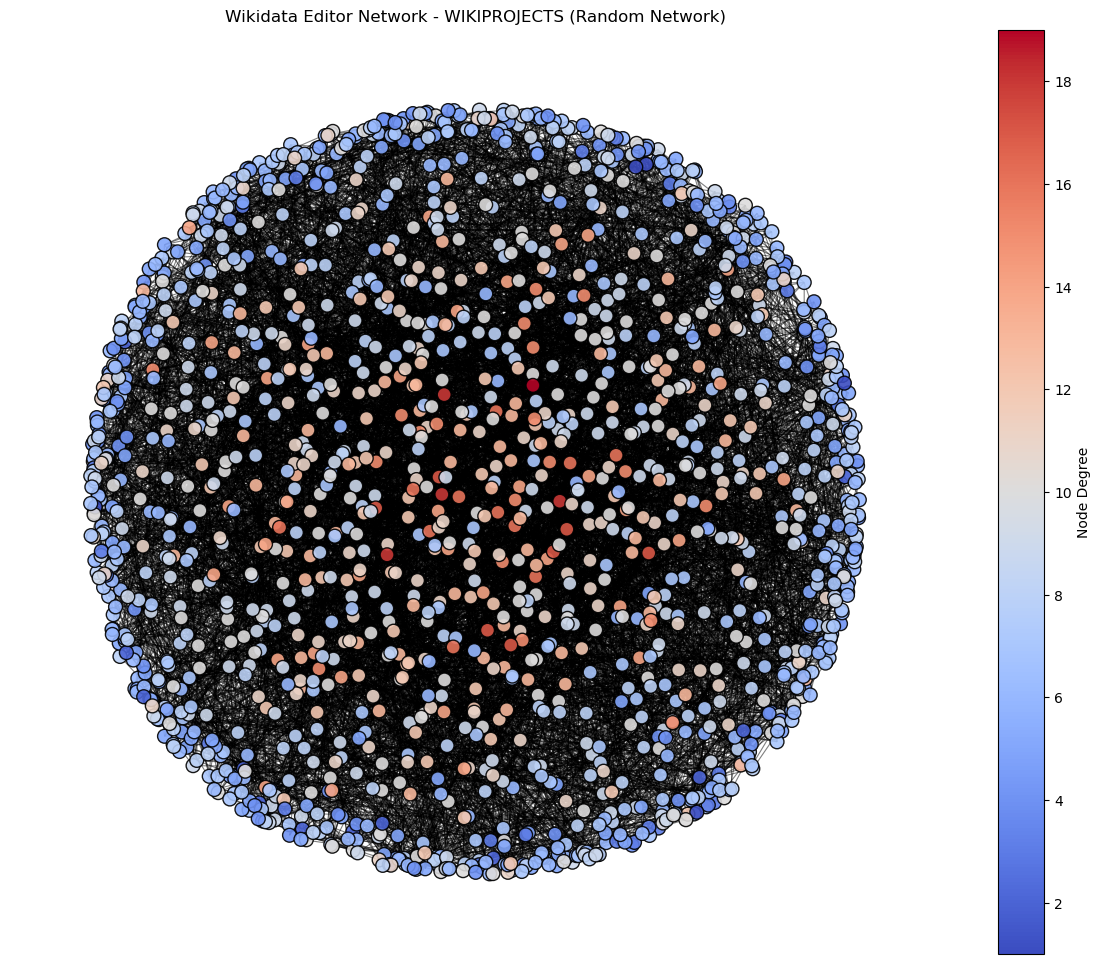

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))

node_degrees = dict(WIKIPROJECTS_random.degree())
node_colors = [node_degrees[n] for n in WIKIPROJECTS_random.nodes()]

nx.draw_networkx_nodes(
    WIKIPROJECTS_random, pos,
    node_color=node_colors,
    cmap=plt.cm.coolwarm,
    node_size=100,
    alpha=0.9,
    edgecolors='black',
    ax=ax
)

nx.draw_networkx_edges(
    WIKIPROJECTS_random, pos,
    alpha=0.5,
    width=0.8,
    ax=ax
)

sm = plt.cm.ScalarMappable(
    cmap=plt.cm.coolwarm,
    norm=plt.Normalize(vmin=min(node_degrees.values()), vmax=max(node_degrees.values()))
)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Node Degree')

ax.set_axis_off()
ax.set_title("Wikidata Editor Network - WIKIPROJECTS (Random Network)")

plt.show()

#### 3.2.3 Degree by user

In [20]:
degree_random_WIKIPROJECTS = {node: WIKIPROJECTS_random.degree(node) for node in WIKIPROJECTS_random.nodes()}
print(degree_random_WIKIPROJECTS)

{0: 7, 1: 8, 2: 5, 3: 11, 4: 8, 5: 13, 6: 5, 7: 6, 8: 5, 9: 6, 10: 12, 11: 7, 12: 4, 13: 6, 14: 4, 15: 7, 16: 10, 17: 7, 18: 7, 19: 7, 20: 11, 21: 8, 22: 10, 23: 3, 24: 9, 25: 6, 26: 12, 27: 7, 28: 5, 29: 11, 30: 7, 31: 4, 32: 10, 33: 8, 34: 8, 35: 3, 36: 4, 37: 7, 38: 5, 39: 3, 40: 12, 41: 12, 42: 9, 43: 10, 44: 7, 45: 5, 46: 6, 47: 6, 48: 8, 49: 14, 50: 7, 51: 13, 52: 16, 53: 8, 54: 7, 55: 8, 56: 5, 57: 10, 58: 6, 59: 9, 60: 8, 61: 6, 62: 4, 63: 7, 64: 7, 65: 10, 66: 7, 67: 8, 68: 9, 69: 9, 70: 11, 71: 11, 72: 10, 73: 12, 74: 5, 75: 7, 76: 13, 77: 9, 78: 11, 79: 11, 80: 10, 81: 7, 82: 14, 83: 6, 84: 2, 85: 5, 86: 7, 87: 6, 88: 9, 89: 6, 90: 14, 91: 4, 92: 9, 93: 5, 94: 6, 95: 9, 96: 6, 97: 8, 98: 10, 99: 7, 100: 10, 101: 11, 102: 10, 103: 13, 104: 11, 105: 3, 106: 6, 107: 7, 108: 6, 109: 7, 110: 10, 111: 8, 112: 11, 113: 6, 114: 6, 115: 6, 116: 15, 117: 10, 118: 8, 119: 9, 120: 6, 121: 8, 122: 6, 123: 8, 124: 4, 125: 7, 126: 7, 127: 7, 128: 9, 129: 6, 130: 10, 131: 8, 132: 5, 133: 13

#### 3.2.4 Top 5 Contributors

In [18]:
top_contributors_random_WIKIPROJECTS = Counter(degree_random_WIKIPROJECTS).most_common(5)
print(top_contributors_random_WIKIPROJECTS)

[(865, 19), (192, 18), (837, 18), (855, 18), (1231, 18)]


#### 3.2.5 Average Clustering Coefficient

In [19]:
avg_clustering_random_WIKIPROJECTS = nx.average_clustering(WIKIPROJECTS_random)
print("Average Clustering Coefficient:", avg_clustering_random_WIKIPROJECTS)


Average Clustering Coefficient: 0.0051137020873862965


#### 3.2.6 Number of Connected Components / Size of Largest Connected Component

In [21]:
num_components_random_WIKIPROJECTS = nx.number_connected_components(WIKIPROJECTS_random)
largest_component_size_random_WIKIPROJECTS = len(max(nx.connected_components(WIKIPROJECTS_random), key=len))

print("Number of Connected Components:", num_components_random_WIKIPROJECTS)
print("Size of Largest Connected Component:", largest_component_size_random_WIKIPROJECTS)

Number of Connected Components: 1
Size of Largest Connected Component: 1620


#### 3.2.7 Betweenness Centrality

In [22]:
betweenness_centrality_random_WIKIPROJECTS = nx.betweenness_centrality(WIKIPROJECTS_random)
betweenness_centrality_top5_random_WIKIPROJECTS = Counter(betweenness_centrality_random_WIKIPROJECTS).most_common(5)
print("Betweenness Centrality Top 5:", betweenness_centrality_top5_random_WIKIPROJECTS)

Betweenness Centrality Top 5: [(865, 0.007214993194597835), (192, 0.006622008784240271), (855, 0.0064398210838274746), (1231, 0.0064046330336581464), (1150, 0.006383958695144824)]


#### 3.2.8 Average Shortest Path (Largest Component)

In [96]:
largest_cc_WIKIPROJECTS_random = max(nx.connected_components(WIKIPROJECTS_random), key=len)
WIKIPROJECTS_random_largest = WIKIPROJECTS_random.subgraph(largest_cc_WIKIPROJECTS_random)
avg_shortest_path_WIKIPROJECTS_random = nx.average_shortest_path_length(WIKIPROJECTS_random_largest)
print("Average Shortest Path Length:", avg_shortest_path_WIKIPROJECTS_random)

Average Shortest Path Length: 3.711712762793677


#### 3.2.9 Threshold Model

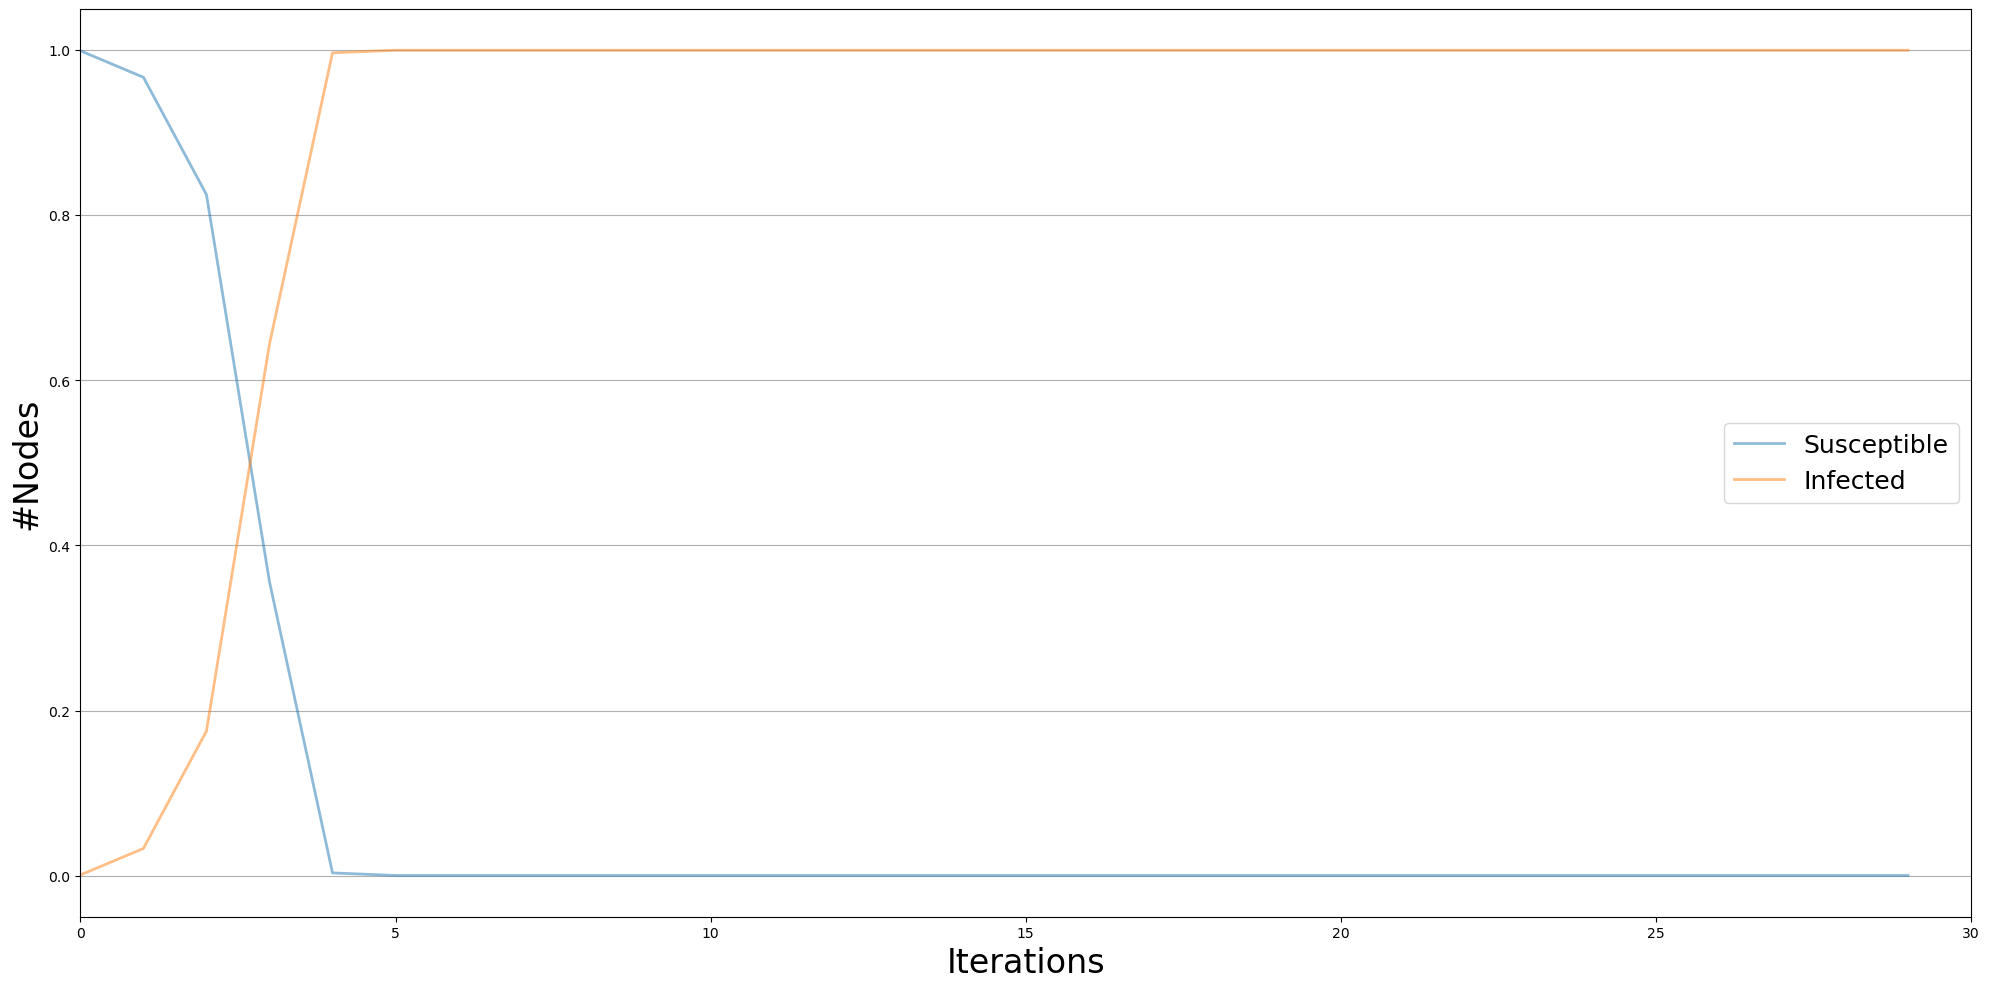

In [78]:
mu, sigma = 0.10, 0.05

model, iters, trends = threshold_model(WIKIPROJECTS_random, mu, sigma, 30)

viz = DiffusionTrend(model, trends)
viz.plot()

### 3.3 Comparison | Request for Comments | (Actual Network vs Random Network)

#### 3.3.1 Degree Comparison

In [56]:
degree_analysis(degree_WIKIPROJECTS, degree_random_WIKIPROJECTS)


--------Average--------
Average Degree of Actual Network:  8.37283950617284
Average Degree of Random Network:  8.37283950617284
--------Standard Deviation--------
Standard Deviation of Degree of Actual Network:  18.52797026283941
Standard Deviation of Degree of Random Network:  2.81539034618687
--------Median--------
Median of Degree of Actual Network:  3.0
Median of Degree of Random Network:  8.0


#### 3.3.2 Top 5 Contributors

In [25]:
print("Top 5 Contributors of Actual Network: ", top_contributors_WIKIPROJECTS)
print("Top 5 Contributors of Random Network: ", top_contributors_random_WIKIPROJECTS)

Top 5 Contributors of Actual Network:  [('Jura1', 329), ('VIGNERON', 187), ('TomT0m', 186), ('Snipre', 183), ('Infovarius', 182)]
Top 5 Contributors of Random Network:  [(865, 19), (192, 18), (837, 18), (855, 18), (1231, 18)]


#### 3.3.3 Average Clustering Coefficient

In [26]:
print("Average Clustering Coefficient of Actual Network: ", avg_clustering_WIKIPROJECTS)
print("Average Clustering Coefficient of Random Network: ", avg_clustering_random_WIKIPROJECTS)

Average Clustering Coefficient of Actual Network:  0.5041946321408051
Average Clustering Coefficient of Random Network:  0.0051137020873862965


#### 3.3.4 Number of Connected Components

In [27]:
print("Number of Connected Components of Actual Network: ", num_components_WIKIPROJECTS)
print("Number of Connected Components of Random Network: ", num_components_random_WIKIPROJECTS)

Number of Connected Components of Actual Network:  202
Number of Connected Components of Random Network:  1


#### 3.3.5 Size of Largest Connected Component

In [28]:
print("Size of Largest Connected Component of Actual Network: ", largest_component_size_WIKIPROJECTS)
print("Size of Largest Connected Component of Random Network: ", largest_component_size_random_WIKIPROJECTS)

Size of Largest Connected Component of Actual Network:  1397
Size of Largest Connected Component of Random Network:  1620


#### 3.3.6 Betweenness Centrality (Top 5)

In [29]:
print("Betweenness Centrality Top 5 of Actual Network: ", betweenness_centrality_top5_WIKIPROJECTS)
print("Betweenness Centrality Top 5 of Random Network: ", betweenness_centrality_top5_random_WIKIPROJECTS)

Betweenness Centrality Top 5 of Actual Network:  [('Jura1', 0.1763795345237367), ('VIGNERON', 0.06733654424652613), ('Infovarius', 0.05667773637791079), ('Snipre', 0.05618565175273256), ('TomT0m', 0.05014446308040661)]
Betweenness Centrality Top 5 of Random Network:  [(865, 0.007214993194597835), (192, 0.006622008784240271), (855, 0.0064398210838274746), (1231, 0.0064046330336581464), (1150, 0.006383958695144824)]


#### 3.3.7 Average Shortest Path

In [97]:
print("Average Shortest Path of Actual Network: ", avg_shortest_path_WIKIPROJECTS)
print("Average Shortest Path of Random Network: ", avg_shortest_path_WIKIPROJECTS_random)

Average Shortest Path of Actual Network:  3.150434927074595
Average Shortest Path of Random Network:  3.711712762793677


#### 3.3.8 Degree Distribution Plot Actual Network

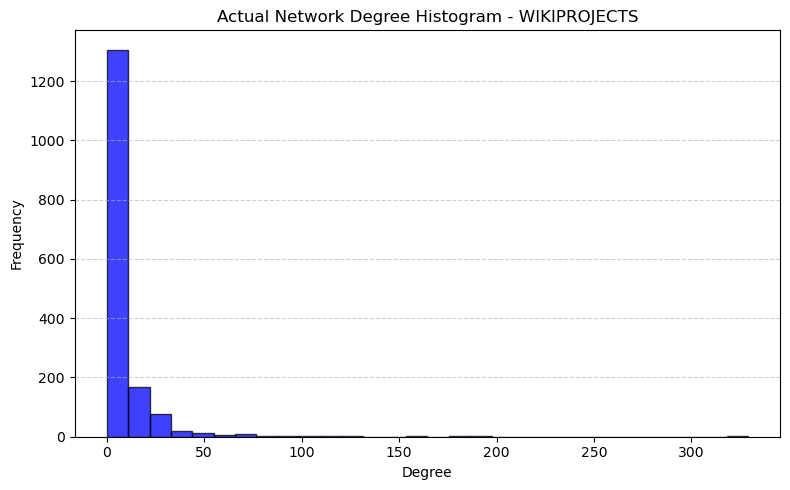

In [31]:
degree_distributions(degree_WIKIPROJECTS, title="Actual Network Degree Histogram - WIKIPROJECTS")

#### 3.3.9 Degree Distribution Plot Random Network

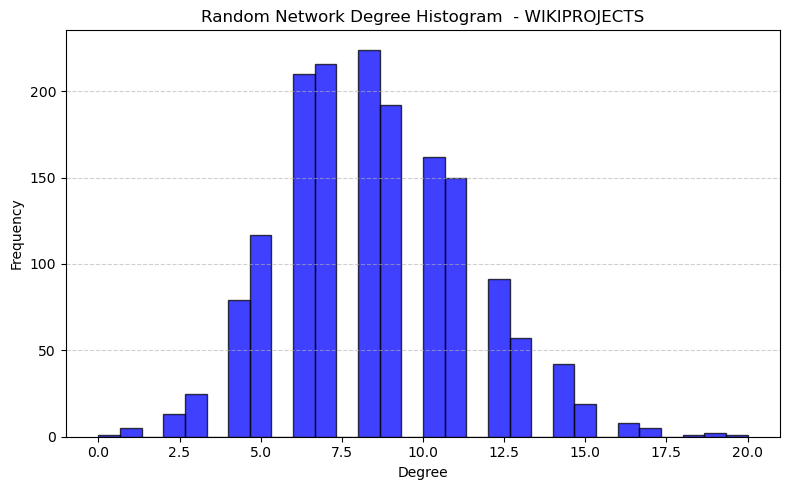

In [32]:
degree_distributions(degree_random_WIKIPROJECTS, title="Random Network Degree Histogram  - WIKIPROJECTS")

## 4 USERS

### 4.1 USERS Graph

This section is used for graph generation for the "USERS" file as well as visualization and calculating it's metrics to be used in section 4.3 for comparison between this network and a random network of similar proportion.

#### 4.1.1 Graph Generation

In [23]:
USERS_Graph = nx.Graph()

all_users=set(users_file["username"].unique()) # Storing users w.r.f. unique usernames
USERS_Graph.add_nodes_from(all_users) # Initializing unique users on the graph


thread_user_map = defaultdict(set) # Initializing dictionary to store user interactions
for i, row in users_file.iterrows():
    key = (row["page_name"], row["thread_subject"])
    thread_user_map[key].add(row["username"]) # Storing user interactions w.r.f. unique page name, and thread subject combinations


for users in thread_user_map.values():
    user_list = list(users)
    for i in range(len(user_list)):
        for j in range(i + 1, len(user_list)): 
            USERS_Graph.add_edge(user_list[i], user_list[j]) # Adding edges from dictionary

print("Number of nodes:", USERS_Graph.number_of_nodes())
print("Number of edges:", USERS_Graph.number_of_edges())

Number of nodes: 11387
Number of edges: 24692


#### 4.1.2 Graph Visualization

In [64]:
pos = nx.spring_layout(USERS_Graph, seed=42, k=1.1, iterations=100)

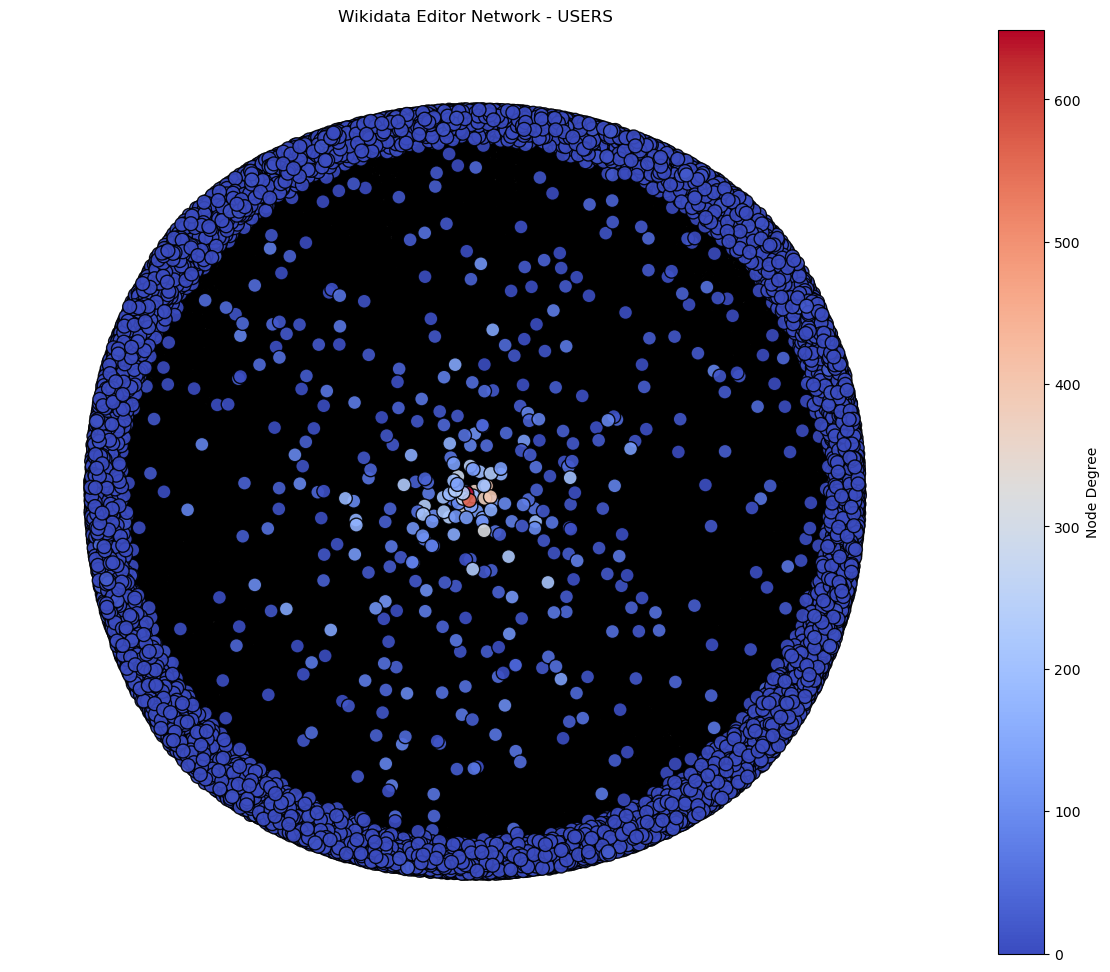

In [65]:
fig, ax = plt.subplots(figsize=(15, 12))

node_degrees = dict(USERS_Graph.degree())
node_colors = [node_degrees[n] for n in USERS_Graph.nodes()]

nx.draw_networkx_nodes(
    USERS_Graph, pos,
    node_color=node_colors,
    cmap=plt.cm.coolwarm,
    node_size=100,
    alpha=0.9,
    edgecolors='black',
    ax=ax
)

nx.draw_networkx_edges(
    USERS_Graph, pos,
    alpha=0.5,
    width=0.8,
    ax=ax
)

sm = plt.cm.ScalarMappable(
    cmap=plt.cm.coolwarm,
    norm=plt.Normalize(vmin=min(node_degrees.values()), vmax=max(node_degrees.values()))
)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Node Degree')

ax.set_axis_off()
ax.set_title("Wikidata Editor Network - USERS")

plt.show()

#### 4.1.3 Degree by user

In [24]:
degree_USERS = {node: USERS_Graph.degree(node) for node in USERS_Graph.nodes()}
print(degree_USERS)

{'Fransplace': 0, '92.227.230.108': 3, 'Pratyush.shrivastava': 2, 'Fixmaster': 2, 'Capricornis crispus': 0, 'DataAnalyticsSir': 0, 'Encycloon': 4, 'Anonymous_username_1510': 2, 'Monsieurbecker': 8, 'JBW': 0, 'Kitayama': 3, 'AirWolf': 1, 'Raystorm': 3, 'Tarawa1943': 0, 'Theodoxa': 3, '50.254.21.211': 1, 'Greifensee': 1, '89.246.199.176': 1, 'CFC': 1, 'Genium': 22, 'Ivanretro': 1, 'Ryoga': 1, 'Anonymous_username_1769': 0, 'Ruukasu2005': 0, 'Beagle84': 1, 'Flappy Pigeon': 1, 'Dodecaedro': 0, 'Github-wiki-bot': 1, 'Anonymous_username_1459': 0, 'TariButtar': 1, 'Spinoziano (BEIC)': 1, 'Malikxan': 1, 'Anonymous_username_1185': 1, 'Mariogoods': 1, 'Edinwiki': 6, 'Io pan': 1, 'B.Velikov': 5, 'Elya': 6, 'Anonymous_username_1416': 0, 'Winternacht': 3, 'Леонид Розенфельд': 0, 'DoSazunielle': 1, 'Chaddy': 1, '&#42;angys*': 2, 'Adithyak1997': 13, 'Mateuszek045': 0, 'Leo0428': 3, 'Renerpho': 1, 'Peaceray': 2, 'Capricorn4049': 1, 'Litlok': 0, 'Niera': 2, '92.230.132.107': 2, '87.240.233.192': 2, 'Cha

#### 4.1.4 Top 5 Contributors

In [60]:
top_contributors_USERS = Counter(degree_USERS).most_common(5)
print(top_contributors_USERS)

[('Infovarius', 649), ('Jura1', 565), ('Multichill', 397), ('VIGNERON', 393), ('Ymblanter', 373)]


#### 4.1.5 Average Clustering Coefficient

In [61]:
avg_clustering_USERS = nx.average_clustering(USERS_Graph)
print("Average Clustering Coefficient:", avg_clustering_USERS)


Average Clustering Coefficient: 0.1827185284282887


#### 4.1.6 Number of Connected Components / Size of Largest Connected Component

In [62]:
num_components_USERS = nx.number_connected_components(USERS_Graph)
largest_component_size_USERS = len(max(nx.connected_components(USERS_Graph), key=len))

print("Number of Connected Components:", num_components_USERS)
print("Size of Largest Connected Component:", largest_component_size_USERS)

Number of Connected Components: 3262
Size of Largest Connected Component: 7767


#### 4.1.7 Betweenness Centrality

In [63]:
betweenness_centrality_USERS = nx.betweenness_centrality(USERS_Graph)
betweenness_centrality_top5_USERS = Counter(betweenness_centrality_USERS).most_common(5)
print("Betweenness Centrality Top 5:", betweenness_centrality_top5_USERS)

Betweenness Centrality Top 5: [('Infovarius', 0.05238292887314278), ('Jura1', 0.04236583817510985), ('VIGNERON', 0.028296264971957363), ('Cycn', 0.027391036734840682), ('Ymblanter', 0.025821624517249658)]


#### 4.1.8 Average Shortest Path (Largest Component)

In [85]:
largest_cc_USERS = max(nx.connected_components(USERS_Graph), key=len)
USERS_largest = USERS_Graph.subgraph(largest_cc_USERS)
avg_shortest_path_USERS = nx.average_shortest_path_length(USERS_largest)
print("Average Shortest Path Length:", avg_shortest_path_USERS)

Average Shortest Path Length: 3.63558102434937


#### 4.1.9 Threshold Model

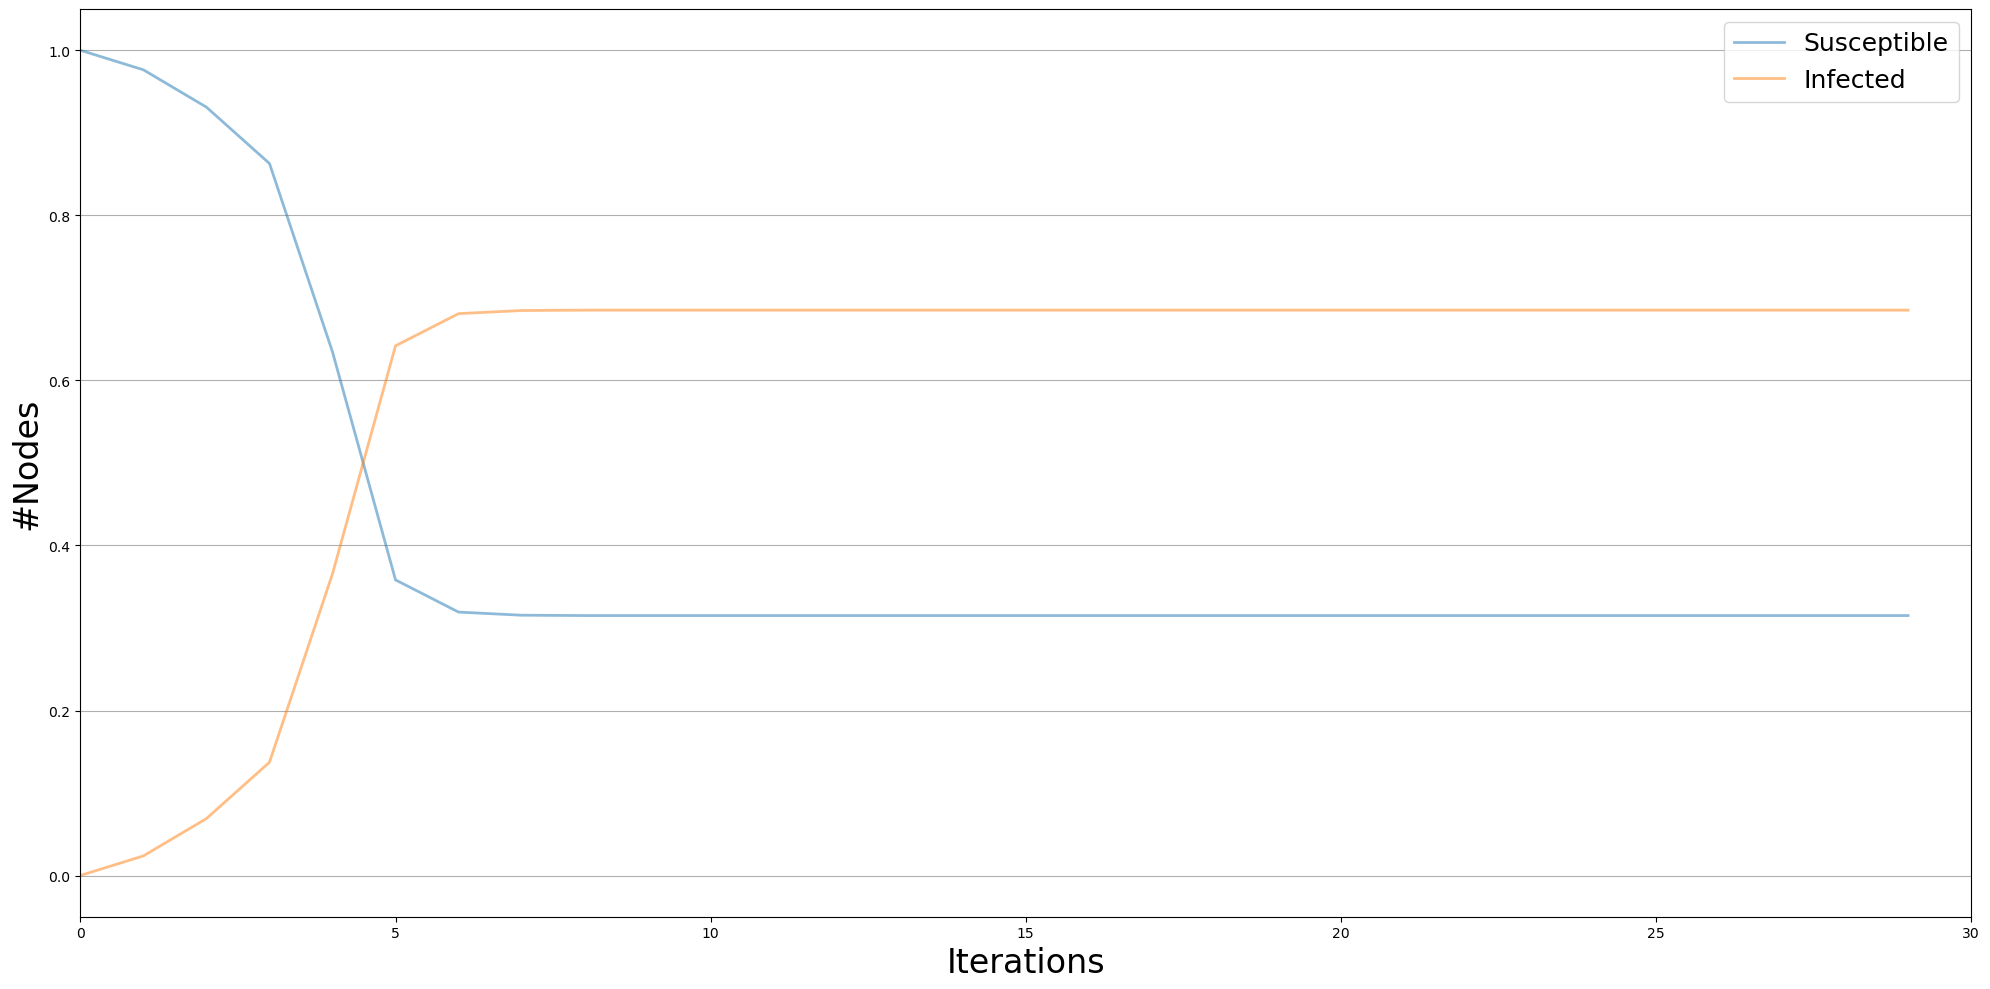

In [75]:
mu, sigma = 0.11, 0.06

model, iters, trends = threshold_model(USERS_Graph, mu, sigma, 30)

viz = DiffusionTrend(model, trends)
viz.plot()

####  4.1.10 Priority List

In [66]:
day_to_check = 3
status_by_day = {}
status_by_day.update(iters[0]['status'])
for day in range(1, day_to_check + 1):
    status_by_day.update(iters[day]['status'])


risk_score = {}
for editor in USERS_Graph.nodes():
    if status_by_day.get(editor, 0) == 0: 
        infected_neighbors = 0
        for neighbor in USERS_Graph.neighbors(editor):
            if status_by_day.get(neighbor, 0) == 1:
                infected_neighbors += 1
        risk_score[editor] = infected_neighbors


priority_list = []
for editor in risk_score:
    score = risk_score[editor]
    priority_list.append((editor, score))

priority_list = sorted(priority_list, key=lambda x: x[1], reverse=True)
print("Top Editors to Check:")
for i in range(3):
    editor, nearby_trolls = priority_list[i]
    print("Editor:", editor, "/ Infected Neighbors:", nearby_trolls)

Top Editors to Check:
Editor: Jura1 / Infected Neighbors: 220
Editor: Multichill / Infected Neighbors: 155
Editor: Ymblanter / Infected Neighbors: 129


### 4.2 Random Network | Request for Comments

This section represents a random network of similar proportions as the network generated in section 4.1. The same visualizations and metrics have been executed on this network for use during comparison in section 4.3.

#### 4.2.1 Graph Generation

In [25]:
N = USERS_Graph.number_of_nodes()
E = USERS_Graph.number_of_edges()
USERS_random = nx.gnm_random_graph(N, E)

print("Number of nodes:", USERS_random.number_of_nodes())
print("Number of edges:", USERS_random.number_of_edges())

Number of nodes: 11387
Number of edges: 24692


#### 4.2.2 Graph Visualization

In [67]:
pos = nx.spring_layout(USERS_random, seed=42, k=1.1, iterations=100)

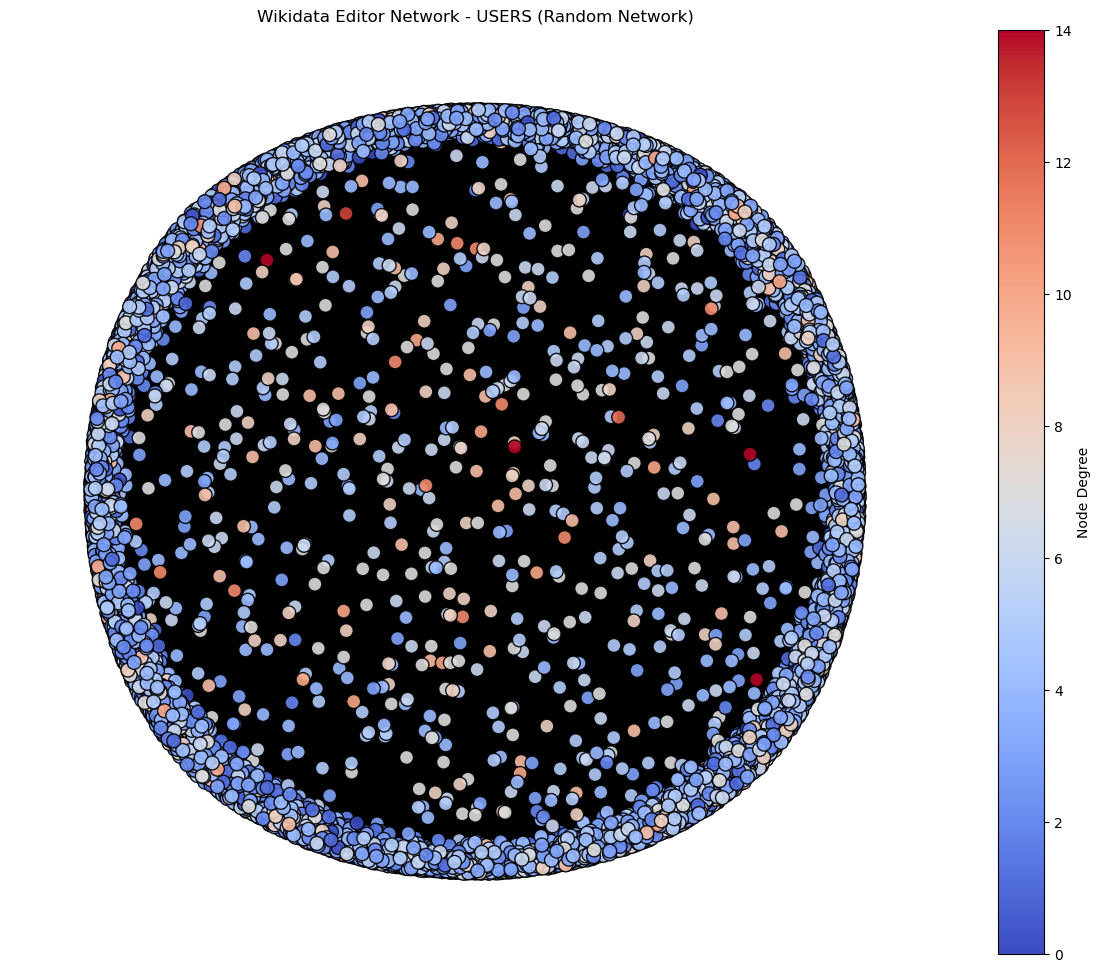

In [68]:
fig, ax = plt.subplots(figsize=(15, 12))

node_degrees = dict(USERS_random.degree())
node_colors = [node_degrees[n] for n in USERS_random.nodes()]

nx.draw_networkx_nodes(
    USERS_random, pos,
    node_color=node_colors,
    cmap=plt.cm.coolwarm,
    node_size=100,
    alpha=0.9,
    edgecolors='black',
    ax=ax
)

nx.draw_networkx_edges(
    USERS_random, pos,
    alpha=0.5,
    width=0.8,
    ax=ax
)

sm = plt.cm.ScalarMappable(
    cmap=plt.cm.coolwarm,
    norm=plt.Normalize(vmin=min(node_degrees.values()), vmax=max(node_degrees.values()))
)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Node Degree')

ax.set_axis_off()
ax.set_title("Wikidata Editor Network - USERS (Random Network)")

plt.show()

#### 4.2.3 Degree by user

In [26]:
degree_random_USERS = {node: USERS_random.degree(node) for node in USERS_random.nodes()}
print(degree_random_USERS)

{0: 5, 1: 2, 2: 3, 3: 4, 4: 8, 5: 5, 6: 5, 7: 2, 8: 3, 9: 4, 10: 10, 11: 6, 12: 2, 13: 2, 14: 5, 15: 7, 16: 5, 17: 5, 18: 3, 19: 5, 20: 4, 21: 3, 22: 4, 23: 3, 24: 5, 25: 4, 26: 5, 27: 7, 28: 9, 29: 5, 30: 5, 31: 7, 32: 3, 33: 4, 34: 4, 35: 1, 36: 4, 37: 5, 38: 6, 39: 3, 40: 2, 41: 0, 42: 5, 43: 4, 44: 6, 45: 4, 46: 2, 47: 4, 48: 3, 49: 4, 50: 5, 51: 5, 52: 6, 53: 5, 54: 7, 55: 8, 56: 5, 57: 4, 58: 6, 59: 3, 60: 1, 61: 4, 62: 6, 63: 1, 64: 3, 65: 4, 66: 5, 67: 6, 68: 3, 69: 5, 70: 1, 71: 9, 72: 7, 73: 4, 74: 5, 75: 3, 76: 3, 77: 2, 78: 9, 79: 3, 80: 4, 81: 4, 82: 4, 83: 1, 84: 4, 85: 7, 86: 8, 87: 4, 88: 3, 89: 5, 90: 4, 91: 4, 92: 4, 93: 2, 94: 7, 95: 4, 96: 4, 97: 4, 98: 4, 99: 2, 100: 6, 101: 5, 102: 8, 103: 8, 104: 8, 105: 2, 106: 4, 107: 3, 108: 1, 109: 4, 110: 4, 111: 7, 112: 5, 113: 4, 114: 4, 115: 6, 116: 3, 117: 6, 118: 1, 119: 4, 120: 3, 121: 6, 122: 2, 123: 9, 124: 3, 125: 1, 126: 5, 127: 6, 128: 3, 129: 6, 130: 3, 131: 6, 132: 5, 133: 4, 134: 2, 135: 4, 136: 4, 137: 7, 138:

#### 4.2.4 Top 5 Contributors

In [70]:
top_contributors_random_USERS = Counter(degree_random_USERS).most_common(5)
print(top_contributors_random_USERS)

[(2496, 14), (6180, 14), (8025, 14), (8354, 14), (8902, 14)]


#### 4.2.5 Average Clustering Coefficient

In [71]:
avg_clustering_random_USERS = nx.average_clustering(USERS_random)
print("Average Clustering Coefficient:", avg_clustering_random_USERS)


Average Clustering Coefficient: 0.00031778229284157094


#### 4.2.6 Number of Connected Components / Size of Largest Connected Component

In [72]:
num_components_random_USERS = nx.number_connected_components(USERS_random)
largest_component_size_random_USERS = len(max(nx.connected_components(USERS_random), key=len))

print("Number of Connected Components:", num_components_random_USERS)
print("Size of Largest Connected Component:", largest_component_size_random_USERS)

Number of Connected Components: 155
Size of Largest Connected Component: 11231


#### 4.2.7 Betweenness Centrality

In [73]:
betweenness_centrality_random_USERS = nx.betweenness_centrality(USERS_random)
betweenness_centrality_top5_random_USERS = Counter(betweenness_centrality_random_USERS).most_common(5)
print("Betweenness Centrality Top 5:", betweenness_centrality_top5_random_USERS)

Betweenness Centrality Top 5: [(8354, 0.004626421047670759), (2496, 0.004309572929460103), (2065, 0.0037524780293793918), (7329, 0.003498983512913688), (4300, 0.003471426301324376)]


#### 4.2.8 Average Shortest Path (Largest Component)

In [84]:
largest_cc_USERS_random = max(nx.connected_components(USERS_random), key=len)
USERS_random_largest = USERS_random.subgraph(largest_cc_USERS_random)
avg_shortest_path_USERS_random = nx.average_shortest_path_length(USERS_random_largest)
print("Average Shortest Path Length:", avg_shortest_path_USERS_random)

Average Shortest Path Length: 6.502098559569846


#### 4.2.9 Threshold Model

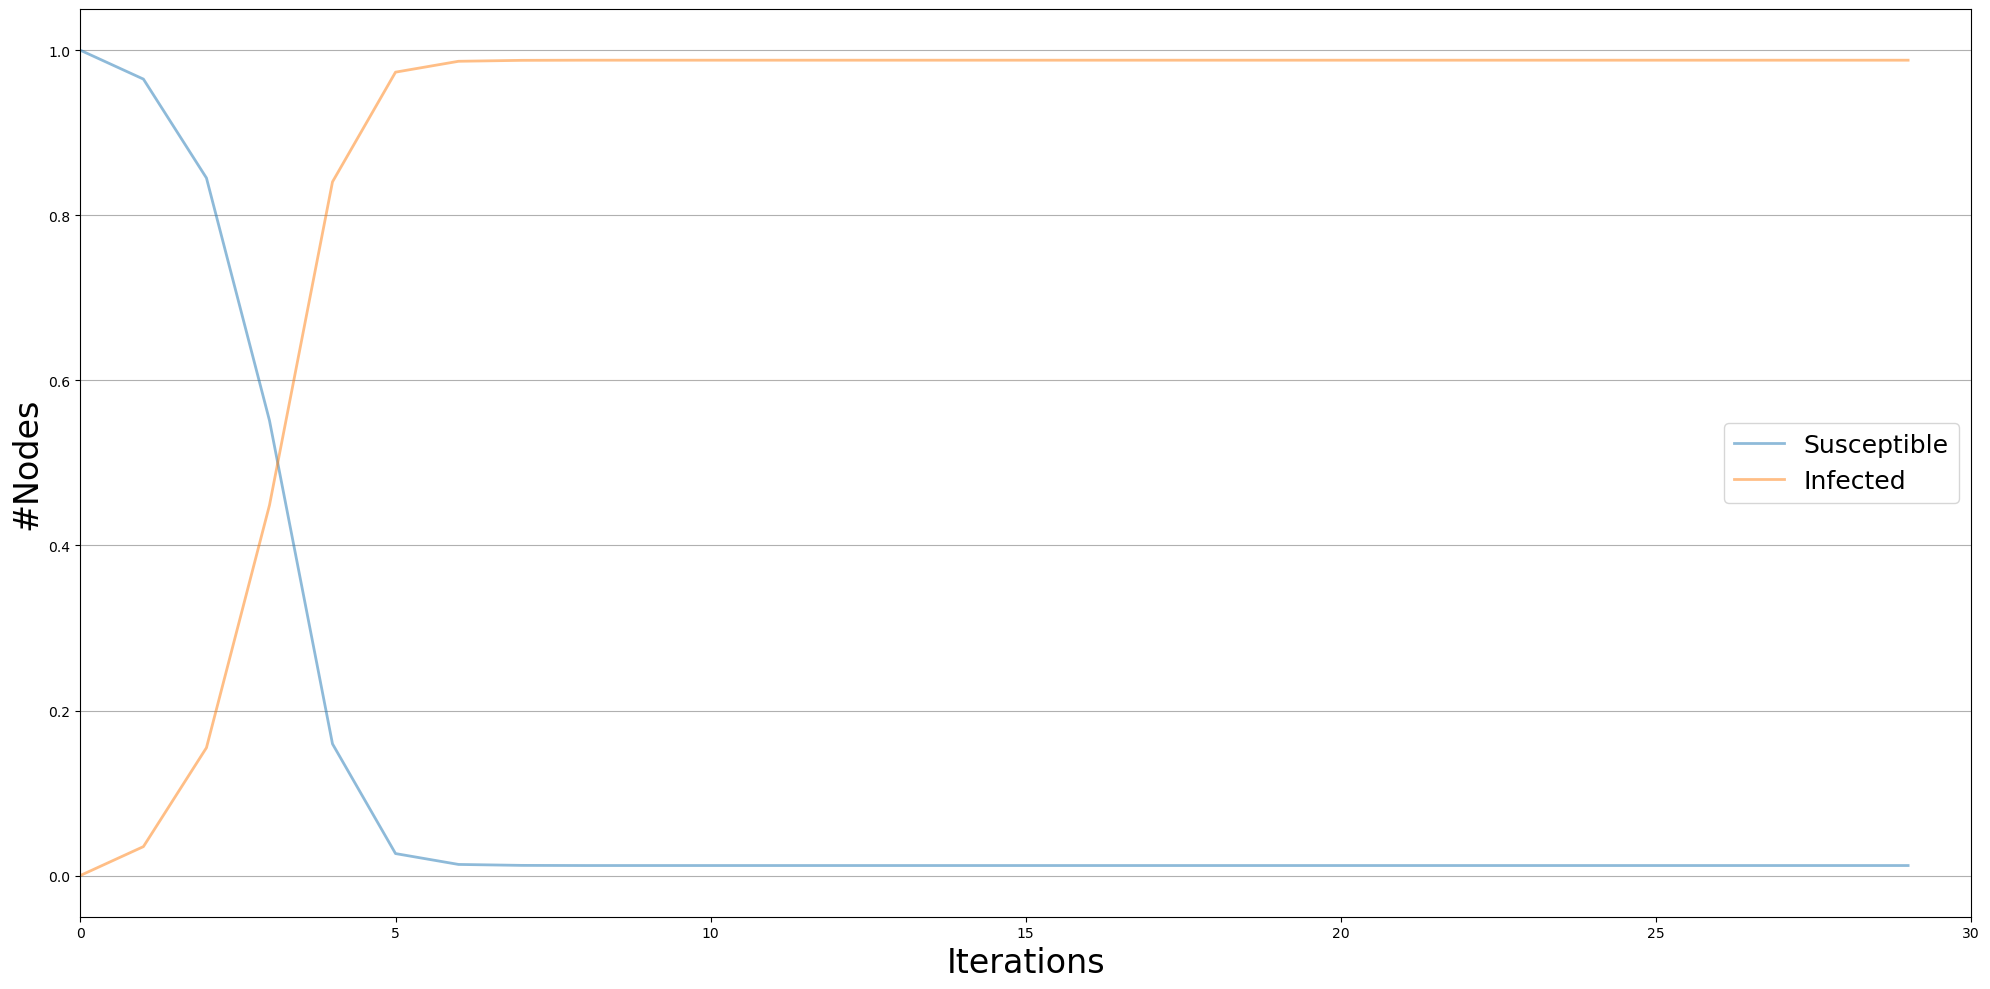

In [79]:
mu, sigma = 0.11, 0.06

model, iters, trends = threshold_model(USERS_random, mu, sigma, 30)

viz = DiffusionTrend(model, trends)
viz.plot()

### 4.3 Comparison | Request for Comments | (Actual Network vs Random Network)

#### 4.3.1 Degree Comparison

In [59]:
degree_analysis(degree_USERS, degree_random_USERS)

--------Average--------
Average Degree of Actual Network:  4.336875384210064
Average Degree of Random Network:  4.336875384210064
--------Standard Deviation--------
Standard Deviation of Degree of Actual Network:  18.773519825392963
Standard Deviation of Degree of Random Network:  2.079388324188745
--------Median--------
Median of Degree of Actual Network:  1.0
Median of Degree of Random Network:  4.0


#### 4.3.2 Top 5 Contributors

In [75]:
print("Top 5 Contributors of Actual Network: ", top_contributors_USERS)
print("Top 5 Contributors of Random Network: ", top_contributors_random_USERS)

Top 5 Contributors of Actual Network:  [('Infovarius', 649), ('Jura1', 565), ('Multichill', 397), ('VIGNERON', 393), ('Ymblanter', 373)]
Top 5 Contributors of Random Network:  [(2496, 14), (6180, 14), (8025, 14), (8354, 14), (8902, 14)]


#### 4.3.3 Average Clustering Coefficient

In [77]:
print("Average Clustering Coefficient of Actual Network: ", avg_clustering_USERS)
print("Average Clustering Coefficient of Random Network: ", avg_clustering_random_USERS)

Average Clustering Coefficient of Actual Network:  0.1827185284282887
Average Clustering Coefficient of Random Network:  0.00031778229284157094


#### 4.3.4 Number of Connected Components

In [78]:
print("Number of Connected Components of Actual Network: ", num_components_USERS)
print("Number of Connected Components of Random Network: ", num_components_random_USERS)

Number of Connected Components of Actual Network:  3262
Number of Connected Components of Random Network:  155


#### 4.3.5 Size of Largest Connected Component

In [79]:
print("Size of Largest Connected Component of Actual Network: ", largest_component_size_USERS)
print("Size of Largest Connected Component of Random Network: ", largest_component_size_random_USERS)

Size of Largest Connected Component of Actual Network:  7767
Size of Largest Connected Component of Random Network:  11231


#### 4.3.6 Betweenness Centrality (Top 5)

In [80]:
print("Betweenness Centrality Top 5 of Actual Network: ", betweenness_centrality_top5_USERS)
print("Betweenness Centrality Top 5 of Random Network: ", betweenness_centrality_top5_random_USERS)

Betweenness Centrality Top 5 of Actual Network:  [('Infovarius', 0.05238292887314278), ('Jura1', 0.04236583817510985), ('VIGNERON', 0.028296264971957363), ('Cycn', 0.027391036734840682), ('Ymblanter', 0.025821624517249658)]
Betweenness Centrality Top 5 of Random Network:  [(8354, 0.004626421047670759), (2496, 0.004309572929460103), (2065, 0.0037524780293793918), (7329, 0.003498983512913688), (4300, 0.003471426301324376)]


#### 4.3.7 Average Shortest Path

In [86]:
print("Average Shortest Path of Actual Network: ", avg_shortest_path_USERS)
print("Average Shortest Path of Random Network: ", avg_shortest_path_USERS_random)


Average Shortest Path of Actual Network:  3.63558102434937
Average Shortest Path of Random Network:  6.502098559569846


#### 4.3.8 Degree Distribution Plot Actual Network

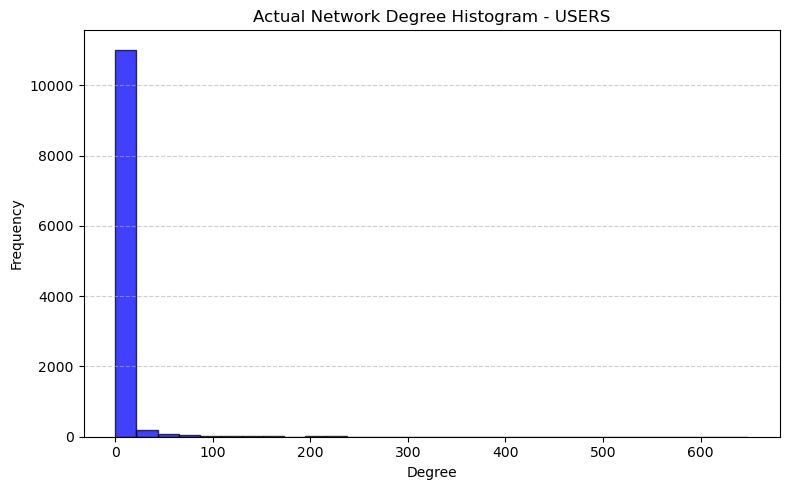

In [33]:
degree_distributions(degree_USERS, title="Actual Network Degree Histogram - USERS")

#### 4.3.9 Degree Distribution Plot Random Network

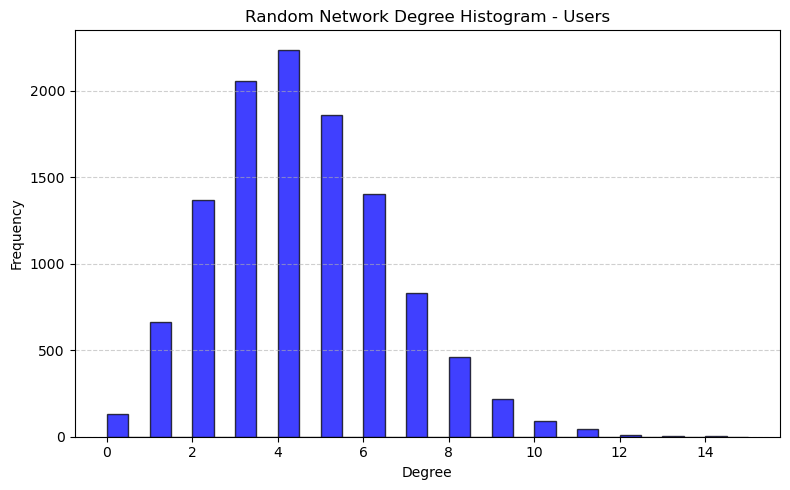

In [34]:
degree_distributions(degree_random_USERS, title="Random Network Degree Histogram - Users")

## References

###### 1 - Weekly Lab Files (1-4): https://github.kcl.ac.uk/k21190656/7CUSMNDA-2025/tree/main/notebooks
###### 2 - NetworkX: https://networkx.org/documentation/stable/reference/index.html
###### 3 - Matplotlib / Axes Locatable: https://matplotlib.org/stable/users/index.html
###### 4 - Pandas: https://pandas.pydata.org/docs/
###### 5 - Epidemics (NDlib): https://ndlib.readthedocs.io/en/latest/reference/models/epidemics/Threshold.html
###### 6 - Counter: https://docs.python.org/3.13/library/collections.html
###### 7 - Diffusion Trend: https://ndlib.readthedocs.io/en/latest/reference/viz/mpl/DiffusionTrend.html
